This file is part of GaPSE
Copyright (C) 2022 Matteo Foglieni

GaPSE is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

GaPSE is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU
General Public License for more details.

You should have received a copy of the GNU General Public License
along with GaPSE. If not, see <http://www.gnu.org/licenses/>.
```


```

# Computations_b1p5-sb0-fevo0

This ipynb provides the code necessary to compute and compare the contribution to the Power Spectrum (PS) monopole of the Primordial Non-Gaussianities (PNG) with the one of the Galaxy Number Count (GNC) General Relativistic (GR) effects.


More precisely, we will calculate here, for the redshift bin $1.0 \leq z \leq 1.5$:
- the Two-Point Correlation Functions (TPCFs)  and PS of the Local PNG;
- the TPCFs and PS made by the sum of all the 25 GNC effects;
- the TPCFs and PS of the standard Newtonian, i.e. the GNC effect term proportional to the matter density field and the velocity gradients (Redshift Space Distortions), which is the leading GR effect 
- the TPCFs and PS the Galaxies in the Plane-Parallel (PP) approximation.

The PNG are described in the $f_{\rm NL}$ prescription (see Slosar, Hirata et al. (2008) and Barreira et al. (2020)), where the primordial gravitational potential during the matter domination $\Phi_{\rm NG}(s)$ includes a quadratic correction:

$$ \Phi_{\rm NG}(s) = \phi_{\rm G}(s) + f_{\rm NL} \left[ \phi^2_G(s) - \phi^2_{\rm G}(s)\right]$$


where $\phi_{\rm G}$ indicates the primordial potential assumed to be a Gaussian random field, $\langle ...\rangle$ denotes ensemble average and $f_{\rm NL}$ describes the amplitude of the correction.

The next section [Short analytical derivation](#Short-analytical-derivation) will describe briefly the analytical expression of the PNG we get from this model; if you're not interested, skip directly to the computations from [Basic Framework](#Basic-Framework) onwards.

All the output files will be placed in the directory `Computations_b1p5-sb0-fevo0` (check to have it, otherwise create it). There is also provided the script `Computations_b1p5-sb0-fevo0.jl`.
The galaxy bias, magnification bias and evolution bias are respectively set to:

$$
    b = 1.5 \;,\quad s_{\mathrm{b}} = 0 \; , \quad \mathit{f}_{\mathrm{evo}} = 0
$$

They are defined as constants in the next cell; you can of course copy this notebook and create another one with different paramenters (remember to change also the `filenames_appendix = "_b1p5-sb0-fevo0` and the `DIR = "Computations"*filenames_appendix*"/`

In [1]:
const B = 1.5;     # Galaxy bias
const S_B = 0.0;   # Magnification bias
const F_EVO = 0.0; # Evolution bias
const filenames_appendix = "_b1p5-sb0-fevo0";

In [2]:
COMPUTE_XIS_GNC = false; # set this to true if you want to compute the TPCFs of the GNC!

In [3]:
DIR = "Computations"*filenames_appendix*"/"; # Directory where the files will be saved
@assert isdir(DIR) "ERROR: DIR=$DIR DOESN'T EXIST!!!"

ps_kwargs(alg::Symbol = :fftlog) = alg == :twofast ?
    Dict(
        :alg => :twofast, :epl => true, :pr => false, 
        :N_left => 12, :N_right => 12,
        :p0_left => [-2.0, 1.0], :p0_right => [-2.0, 1.0],
        :int_s_min => 1e0, :int_s_max => 1200.0,
        :cut_first_n=>0, :cut_last_n => 0
    ) : alg == :fftlog ?
    Dict(
        :alg => :fftlog, :pr=>true, :ν => 1.5, 
        :n_extrap_low => 300, :n_extrap_high => 300, 
        :n_pad => 500, :cut_first_n=>0, :cut_last_n => 0,
    ) : throw(AssertionError("alg = :fftlog (recommended) or alg = :twofast !"));
tf = :fftlog;

## Short analytical derivation

### Plain Parallel approximation

The plane-parallel (or flat sky) approximation is a widely used approximation that allow to derive simple analytical expressions for the PS and TPCFs of the galaxies.
The key of thius method is to assume that the distance between each pair of galaxies is far less than the distance of each galaxy from the observer. As a consequence, we can neglected the variation of the versor of observation $\mathbf{\hat{s}}$ from galaxy to galaxy. In other words, all the galaxies lie on parallel planes, rather than on concentric spheres.

Here we show only the results, both for the PS:
$$
\begin{equation}
    P_{\mathrm{g}, r}^{\rm pp}(k, z, \mu) =
        P_{0}^{\rm pp}(k, z)  +
        P_{2}^{\rm pp}(k, z) \, \mathcal{L}_{2}(\mu) +
        P_{4}^{\rm pp}(k, z) \, \mathcal{L}_{4}(\mu) \, ,
\end{equation}
$$
$$
\begin{align}
    &P_{0}^{\rm pp}(k, z) =  
        P(k, z)\left(
            b^2 + \frac{2}{3} \, b \, f(z) +
                \frac{1}{5} \, f^2(z)
        \right) \, ,
        \\[3pt]
     &P_{2}^{\rm pp}(k, z) =  
        P(k, z)\left(
            \frac{4}{3} \, b \, f(z)+
            \frac{4}{7} \, f^2(z)
        \right) \, ,
        \\[3pt]
    &P_{4}^{\rm pp}(k, z) =  
        P(k, z)\left(
            \frac{8}{35} \, f^2(z)
        \right) \, .
\end{align}
$$

and for the TPCFs:
$$
\begin{equation}
    \xi_{\mathrm{g}, r}^{\rm pp}(k, z, \mu) =
        \xi_{0}^{\rm pp}(k, z)  +
        \xi_{2}^{\rm pp}(k, z) \, \mathcal{L}_{2}(\mu) +
        \xi_{4}^{\rm pp}(k, z) \, \mathcal{L}_{4}(\mu) \, ,
\end{equation}
$$

$$
\begin{align}
    &\xi_{0}^{\rm pp}(k, z) =  
         D^2(z) \, I_0^0(s)\left(
            b^2 + \frac{2}{3} \, b \, f(z) +
                \frac{1}{5} \, f^2(z)
        \right) \, ,
        \\[3pt]
     &\xi_{2}^{\rm pp}(k, z) =  
        - D^2(z) \, I_2^0(s)\left(
            \frac{4}{3} \, b \, f(z)+
            \frac{4}{7} \, f^2(z)
        \right) \, ,
        \\[3pt]
    &\xi_{4}^{\rm pp}(k, z) =  
        D^2(z) \, I_4^0(s)\left(
            \frac{8}{35} \, f^2(z)
        \right) \, .
\end{align}
$$

where:
- $b$ is the galaxy bias
- $z$ is the redshift associated to the comoving distance $s$ in this cosmology
- $D$ the linear growth factor and $f$ the linear growth rate
- $I_\ell^n$ is defined as
  $$
  I_\ell^n(s) = \int_0^{+\infty} \frac{\mathrm{d}q}{2\pi^2} 
  \, q^2 \, P(q) \, \frac{j_\ell(qs)}{(qs)^n}
  $$
  with $P(q)$ as the matter Power Spectrum at $z=0$ and $j_\ell$ as spherical
  Bessel function of order $\ell$.

Of course they are related through an Hankel transform

$$
\begin{equation}
    \xi_\ell(s) = 
        i^\ell \, \int_0^\infty\!\frac{\mathrm{d} k \, k^2}{2\pi^2} \, 
        P_\ell(k) \, j_\ell(k s) 
    \; , \qquad
    P_\ell(k) = 
        4 \pi (-i)^\ell 
        \int_0^\infty\!\mathrm{d} s \, s^2 \, 
        \xi_\ell(s) \, j_\ell(k s) \, .
\end{equation}
$$

### PNG halo bias

First of all, we start from the Poisson equation in real comoving space:

$$
\begin{equation}
    \nabla^2 \Phi_{\mathrm{NG}}(\mathbf{s}, z) = - \frac{4 \pi G}{c^2}
        \langle\rho\rangle D^2(z) \, \delta_{\rm NG}(\mathbf{s}) \, ,
\end{equation}
$$


where the minus sign comes from the fact that we defined $\Phi_{\rm NG}$ as $-$ the Newtonian gravitational potential, and the $c^2$ arises because we set the gravitational potentials as adimensional quantities

Using the first Friedmann equation for a flat Universe, taking into account the Hubble parameter evolution in an Einstein-De Sitter Universe, going into Fourier space and considering also the matter transfer function $T_m(k)$ (which describes the evolution of perturbations through the epochs of horizon crossing and radiation/matter transition), we get:

$$
\begin{equation}
    \delta_{\rm NG}(\mathbf{k}) = \alpha(k,z) \, \Phi_{\rm NG}(\mathbf{k}) \; ,
    \qquad \qquad
    \alpha(k,z) := \frac{2}{3} 
        \frac{k^2 T_m(k) D(z)}{\Omega_{\rm M0}}
        \left(\frac{c}{H_0}\right)^2 \, .
\end{equation}
$$

NOTE: n order to work with an $\alpha$ bias properly normalised, we added the numerical factor $0.779107$ to the numerator of $\alpha$. In this way, $0.779107 \, D(z) \, (1+z) \simeq 1$ at the edge of the matter domination in this cosmology.

Then, we have to derive the halo bias $b_\phi$ of the non-Gaussian perturbational effects.
If we follow the approach described by Slosar, Hirata et a. (2008), that use the long-short wavelength split procedure, we get the following expression (that we do not proof here):

$$
\begin{split}
    b_L(M,k) &= b_L^{\rm Gaussian}(M) + \Delta b(M,k) \, , \\
    \Delta b (k) = 
        3 \delta_{\rm c} &(b - 1) \mathit{f}_{\rm NL}
        \frac{\Omega_{\rm M0}}{k^2 T_m(k) D(z)} 
        \left(\frac{H_0}{c}\right)^2 \, . 
\end{split}
$$

where the Lagrangian bias $b_{\rm L}$ can be then related to the more common Eulerian one $b$ taking into account the Eulerian space clustering $b = b_{\rm L} + 1 $.

It is frequently defined the bias parameter $b_\phi$ as
$$
\begin{align}
    b_\phi(z) := 2 \, \delta_{\rm c} \, (b(z) - 1)
    \; \; 
    \Rightarrow
    \; \;
    \Delta b (k, z) = 
        \frac{b_\phi(z) \mathit{f}_{\rm NL}}{\alpha(k,z)}
        \left(\frac{H_0}{c}\right)^2 \, .
\end{align}
$$

However, in recent works as the one of Barreira et al. (2020) is not a good description for stellar mass selected object: the predicted $b_\phi$ is lower than the measured one.
They then propose a modified version of the previous expression:
$$
    b_\phi = 2 \, \delta_{\rm c} \, (b - p) \; , 
    \; \; p \in [0.4, \,0.7] \, .
$$

### Putting together

Putting these two things together, the galaxies Power Spectrum in flat sky, with the non-Gaussian effects and the effective redshift approximation is then (dropping the $r$ subscript for the redshift space):

$$
\begin{align}
    P_{\rm g}(k,z_{\rm eff},\mu) &= 
        \left[
            b + f(z_{\rm eff}) \mu^2 + 
            b_\phi \mathit{f}_{\rm NL} \alpha(k,z_{\rm eff})
        \right]^2 
        D^2(z_{\rm eff})\, P(k)
        \\[6pt]
    %%%%%%%%%%%%%%%%%%%%%%%
    &\simeq
        \left[
            b + f(z_{\rm eff}) \mu^2
        \right]^2 \, 
        D^2(z_{\rm eff}) \, P(k) +
        \nonumber\\[2pt]
        &\qquad\; \;
        2 \left[b + f(z_{\rm eff}) \mu^2 \right] 
        b_\phi \mathit{f}_{\rm NL} \, \alpha(k, z_{\rm eff}) \, 
        D^2(z_{\rm eff}) \, P(k) \, , 
\end{align}
$$

where $P(k)$ is matter Power Spectrum at redshift $z=0$. Note that in the second line we neglected the term of the second order wrt $\mathit{f}_{\rm NL}$. Defining the $\mathit{f}_{\rm NL}$-independent part as $P_{\mathit{f}_{\rm NL}=0}(k,z)$, the contribution of the non-Gaussian effects to the galaxies Power Spectrum is simply

$$
\begin{align}
    S(k, z_{\rm eff}, \mu) :&= 
        P_{\rm g}(k, z_{\rm eff}) - 
        P_{\mathit{f}_{\rm NL}=0}(k,z_{\rm eff})
        \nonumber\\[4pt]
    &=
        2 \left[b + f(z_{\rm eff}) \mu^2\right] 
        \, b_\phi \mathit{f}_{\rm NL} \, 
        \alpha(k, z_{\rm eff}) \,  D^2(z_{\rm eff}) \, 
        P(k)
\end{align}
$$

Now we expand in multipoles $S$:

$$
\begin{equation}
    S(k, z_{\rm eff}, \mu) = 
        \sum_{\ell = 0}^\infty
        S_\ell(k,z_{\rm eff}) \mathcal{L}_{\ell}(\mu) \, ,
\end{equation}
$$

$$
\begin{align}
    S_\ell(k, z_{\rm eff}) &= 
        \frac{2 \ell + 1}{2}
        \int_{-1}^{1} \mathrm{d} \mu \, 
        \mathcal{L}_{\ell}(\mu) \, S_\ell(k,z_{\rm eff},\mu)
        \nonumber\\[6pt]
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    &=
        \frac{2 \ell + 1}{2} \, 
        2 \, b_\phi \mathit{f}_{\rm NL} \, 
        \alpha(k, z_{\rm eff}) \,  D^2(z_{\rm eff})
        P(k)
        \int_{-1}^{1} \mathrm{d} \mu \,
        \left[b + f(z_{\rm eff}) \mu^2\right] 
    \nonumber\\[6pt]
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    &=
        2 \, b_\phi \mathit{f}_{\rm NL} \,
        \alpha(k, z_{\rm eff}) \, D^2(z_{\rm eff}) \,
        P(k) \, 
        \frac{2 \ell + 1}{2}
        \left\{
            2 \, b \, \delta_{\ell 0} +
            f(z_{\rm eff})
            \left[
                \frac{2}{3}\delta_{\ell 0} +
                \frac{4}{15} \delta_{\ell 2}
            \right]
        \right\}
    \nonumber\\[6pt]
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    &=
        2 \, b_\phi \mathit{f}_{\rm NL} \,
        \alpha(k, z_{\rm eff}) \, D^2(z_{\rm eff}) \,
        P(k)
        \left\{
            \left[
                b + \frac{f(z_{\rm eff})}{3}
            \right] \delta_{\ell 0} +
            \left[
                \frac{2}{3}f(z_{\rm eff})
            \right]\delta_{\ell 2}
        \right\} \, .
\end{align}
$$

which tells that only the monopole and the quadrupole are non-vanishing, as one might expect from the plane-parallel approximation we are basing our derivation.

The corresponding TPCF monopole S is then

$$
\begin{align}
    S_{\ell=0}^{(S)}(s) &= 
        \int_0^\infty \frac{\mathrm{d} k}{2\pi^2} \, 
        k^2 \, j_0(k s) S_{\ell = 0}(k, z)  
    \nonumber\\[6pt]
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    &=
        2 \, b_\phi \mathit{f}_{\rm NL} \,
        D^2(z_{\rm eff}) \left(b + \frac{f(z_{\rm eff})}{3}\right)  
        \int_0^\infty \frac{\mathrm{d} k}{2\pi^2} \, 
        k^2 \, j_0(k s) \, P(k) \, \alpha(k, z) \, , 
\end{align}
$$


which involve an $\alpha$-biased version of the $I_\ell^n$ integrals previously defined:

$$
\begin{equation}
    J_{\ell} (s) :=
        \int_0^\infty \frac{\mathrm{d} q}{2\pi^2} \, 
        k^2 \, j_\ell(q s) \, P(q) \, \alpha(q, z) \, .
\end{equation}
$$

The quadrupole can be obtained in the same way. We can then write

$$
\begin{align}
    &\xi^{(S)}(s, \mu) = 
        \xi_{0}^{(S)}(s) + 
        \xi_{2}^{(S)}(s) \mathcal{L}_{2}(\mu) \, ,
    \\[8pt]
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    \xi_{0}^{(S)}&(s) =
        2 \left(b + \frac{f(z_{\rm eff})}{3}\right) 
        b_\phi \mathit{f}_{\rm NL} \,  D^2(z_{\rm eff}) \, 
        J_0(s) \, ,
     \\[6pt]
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    \xi_{0}^{(S)}&(s) =
        \frac{4}{3} f(z_{\rm eff})\,
        b_\phi \mathit{f}_{\rm NL} \,  D^2(z_{\rm eff}) \, 
        J_2(s) \, .
\end{align}
$$

Now that we have obtained the analytical expansion in multipoles of $S$, we can follow the same procedure for the GNC TPCFs.
We show here the expression with the azimuthally symmetric window function $F(x,\mu)$ defined in the code:

$$
\begin{equation}
    \left\langle\hat{P}_L^{(S)}(k)\right\rangle = \frac{2 \, (-i)^L }{A}
        \int_0^\infty\!\mathrm{d} s \, s^2 \, 
        \xi_L^{(S)}(s) j_L(ks) \, ,
\end{equation}
$$
$$
\begin{equation}
    \xi_L^{(S)}(s)  =
        \frac{2 L + 1}{2}
        \int_{-1}^{1} \! \mathrm{d} \mu \, \xi^{(S)}(s, \mu) \mathcal{L}_{L}(\mu)
        \mathcal{F}\left(s, \mu\right) \, ,
\end{equation}
$$
$$
\begin{equation}
    \mathcal{F}\left(s, \mu\right)  =
        \int_0^\infty\!\mathrm{d} s_1 \, s_1^2 \, 
        \phi(s_1) \, \phi\left(\sqrt{s_1^2 + s^2 + 2 \, s_1 \, s \, \mu}\right) \, 
        F\left(\frac{s}{s_1}, \mu\right) \, .
\end{equation}
$$
$$
\begin{align}
    F(x, \mu) := 
        4\pi \int_0^{\theta_{\rm MAX}} \!\!&\mathrm{d}\theta_1 
        \int_0^{\pi} \!\mathrm{d}\theta \; 
        \Theta\left(
            \frac{
                x\cos(\theta) + \cos(\theta_1)
            }{
                \sqrt{x^2 + 1 +2x\mu}} - 
                \cos\left(\theta_{\rm MAX}\right)
            \right)
        \Theta(\mu - \cos{(\theta + \theta_1})) \times
        \nonumber \\ 
        &\Theta(\cos(\theta - \theta_1) - \mu)
        \frac{\sin(\theta)\sin(\theta_1)}{
            \sqrt{
                \left[\sin(\theta)\sin(\theta_1)\right]^2 - 
                \left[\cos(\theta)\cos(\theta_1) - \mu\right]^2 
            }
        } \, .
\end{align}
$$

Now that we derived the analytical expression of the $S$ Power Spectrum contribution, we can compare it with the GNC GR effects one. The question that we want to answer is if the GR effects are degenerate with the non-Gaussianities in the $\mathit{f}_{\rm NL}$ prescription.

## Basic Framework

### Definition of a Cosmology

In [4]:
PATH_TO_GAPSE = "../../GaPSE/";

In [5]:
include(PATH_TO_GAPSE * "src/GaPSE.jl");

In [6]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions, TwoFAST, ProgressMeter
using Printf, LaTeXStrings, GridInterpolations, LegendrePolynomials #, StatsPlots, Turing

In [7]:
FILE_F_MAP =  PATH_TO_GAPSE * "data/NEW_F_pi2.txt";
#FILE_F_MAP =  PATH_TO_GAPSE * "data/F_REFERENCE_pi2.txt";
#=
kwargs_map_F_hcub = Dict(
     :θ_max => π / 2.0, :tolerance => 1e-10, 
     :rtol => 1e-2, :atol => 1e-3, :pr => true,
);

kwargs_map_F_trap = Dict(
     :θ_max => π / 2.0, :tolerance => 1e-10, 
     :N => 1000, :pr => true,
);

xs = [x for x in 0:0.02:5]
μs = union(
    [μ for μ in range(-1.0, -0.98, length = 50)], 
    [μ for μ in range(-0.98, 0.98, length = 102)],
    [μ for μ in range(0.98, 1.0, length = 50)]);
GaPSE.print_map_F(FILE_F_MAP, xs, μs; 
    alg = :trap, Fmap_opts = kwargs_map_F_trap # we recommend to use :trap
    #alg = :hcub, Fmap_opts = kwargs_map_F_hcub # but you can use also :hcub if you prefer
)
=#

In [8]:
z_min, z_max, θ_max = 1.0, 1.5, π / 2.0

FILE_BACKGROUND = PATH_TO_GAPSE * "data/WideA_ZA_background.dat";

#=
WFI_opts = Dict(
    :llim => nothing, :rlim => nothing, 
    :rtol => 1e-2, :atol => 0.0, 
    :N => 1000, :pr => true,
)
=#

params = GaPSE.CosmoParams(z_min, z_max, θ_max;
    Ω_b = 0.0489, Ω_cdm = 0.251020, 
    h_0 = 0.70, s_lim = 1e-2, z_spline_lim = 1000.0,
    b1 = B, s_b1 = S_B, 𝑓_evo1 = F_EVO, 
    b2 = nothing, s_b2 = nothing, 𝑓_evo2 = nothing,
    IPS_opts = Dict(
        :fit_left_min => 1e-6, :fit_left_max => 3e-6,
        :fit_right_min => 1e1, :fit_right_max => 2e1),
    IPSTools_opts = Dict(
        :N => 1024, :fit_min => 0.05, :fit_max => 0.5, 
        :con => true, :k_min => 1e-8, :k_max => 10.0),
    #=
    WFI_opts = Dict(
        :llim => nothing, :rlim => nothing, 
        :rtol => 1e-2, :atol => 0.0, 
        :N => 1000, :pr => true,)
    =#
);

In [9]:
#FILE_F_MAP =  PATH_TO_GAPSE * "data/NEW_F_pi2.txt";
FILE_IF_MAP = PATH_TO_GAPSE * "data/NEW_IntegrF_pi2_z115.txt";

#FILE_F_MAP = PATH_TO_GAPSE*"data/F_REFERENCE_pi2.txt";
#FILE_IF_MAP = PATH_TO_GAPSE*"data/IntegrF_REFERENCE_pi2_z115.txt";

#=
calc_μs = union(
    [μ for μ in range(-1.0, -0.98, length = 50)], 
    [μ for μ in range(-0.98, 0.98, length = 102)],
    [μ for μ in range(0.98, 1.0, length = 50)]);

GaPSE.print_map_IntegratedF(
    z_min, z_max, calc_μs,
    FILE_F_MAP, FILE_IF_MAP, 
    FILE_BACKGROUND;
    alg = :trap, N_ss = 200, m = 2.1,
    Dict(
        :llim => nothing, :rlim => nothing, 
        :rtol => 1e-2, :atol => 0.0, 
        :N => 1000, :pr => true,
    )...
)
=#

In [10]:
FILE_PS = PATH_TO_GAPSE * "test/datatest/file_pk.txt";
cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP, FILE_IF_MAP);

GaPSE.parameters_used(stdout, cosmo)

###############
#    GaPSE    #
############### 
#
# The Cosmology considered had the following paremeters:
# 
# - Matter Power Spectrum input file: "../../GaPSE/test/datatest/file_pk.txt"
# - Background data input file: "../../GaPSE/data/WideA_ZA_background.dat"
# - F window function input file: "../../GaPSE/data/NEW_F_pi2.txt"
# - Integrated F window function input file: "../../GaPSE/data/NEW_IntegrF_pi2_z115.txt"
#
# - Basic CosmoParams considered: 
#	 z_min = 1.0 	 z_max = 1.5
#	 θ_max = 1.5707963267948966 [rad] 	 h_0 = 0.7
#	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
#	 b1 = 1.5 	 f_evo1 = 0.0 	 s_b1 = 0.0
#	 b2 = 1.5 	 f_evo2 = 0.0 	 s_b2 = 0.0
#
# - CosmoParams about the Input Power Spectrum: 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#
# - CosmoParams about the Input Power Spectrum Tools: 
#	 k_max = 10.0 	 fit_max = 0.5 	 N = 1024 	 
#	 con = true 	 k_min = 1.0e-8 	 fit_min = 0.05 	 
#
# - Computed quantities: 


### Check window function F an integrated IF

In [11]:
my_matrix = readdlm(FILE_F_MAP, comments=true)
my_xs = convert(Vector{Float64}, my_matrix[:,1])
my_μs = convert(Vector{Float64}, my_matrix[:,2])
my_Fs = convert(Vector{Float64}, my_matrix[:,3]);
my_F_grid = GridInterpolations.RectangleGrid( unique(my_μs), unique(my_xs))
my_spline_F(x, μ) = GridInterpolations.interpolate(my_F_grid, my_Fs, [μ, x]);
matrix_Fs = reshape(my_Fs, (length(unique(my_μs)), :))';

In [12]:
my_Imatrix = readdlm(FILE_IF_MAP, comments=true)
my_Iss = convert(Vector{Float64}, my_Imatrix[:,1])
my_Iμs = convert(Vector{Float64}, my_Imatrix[:,2])
my_IFs = convert(Vector{Float64}, my_Imatrix[:,3]);
my_IF_grid = GridInterpolations.RectangleGrid( unique(my_Iμs), unique(my_Iss))
my_spline_IF(s, μ) = GridInterpolations.interpolate(my_IF_grid, my_IFs, [μ, s]);
matrix_IFs = reshape(my_IFs, (length(unique(my_Iμs)), :))';

In [13]:
#=
pyplot()
p1 = plot(my_xs, my_μs, my_Fs; xl="x", yl="μ", zl="F", 
    st = :surface, c=cgrad([:yellow, :red]), size=(600, 300), 
    title="my F", legend = false)
p2 = plot(my_Iss, my_Iμs, my_IFs; xl="s", yl="μ", zl="intF", 
    st = :surface, c=cgrad([:yellow, :red]), #size=(600, 300), 
    title="my IntF", legend = false)
p3 = plot(p1, p2, size=(800, 400))
=#

In [14]:
#=
pyplot()

p1 = heatmap(unique(my_μs), unique(my_xs), matrix_Fs, xl=L"$\mu$", yl = L"$x$", colorbar_title=L"$F$", title = "my F")
p2 = heatmap(unique(my_Iμs), unique(my_Iss), matrix_IFs, xl=L"$\mu$", yl = L"$S$", colorbar_title=L"$IF$", title = "my Int F" )

plot(p1, p2, size = (1000, 400))
=#

In [15]:
#=
pyplot()

title = plot(title = "Slices of F for different x values", grid=false, 
    showaxis = false, bottom_margin = -25Plots.px, ticks=false)

θ_max =  π/2.0;
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0];
μs = range(-1.0, 1.0, length=100);

LIST_P = [plot() for i in 1:length(xs)]

for (i,x) in enumerate(xs)
    tit = "\n\n x = $x"
    xs_1 = μs
    ys_1 = [my_spline_F(x, μ) for μ in xs_1]

    LIST_P[i] = plot(xs_1, ys_1, 
        #xaxis=:log, yaxis=:log, 
        lc=:red, title=tit, legend=false,
        ylabel=L"F(x,\mu)", ls=:solid, 
        #xticks=10.0 .^ range(-3,0, step=1),
    )
end


l = @layout [ A{0.003h} ; a b c d ; e f g h ; i l j _]
ALL_PLOTS = plot(title, LIST_P..., layout=l,
    left_margins = 15Plots.px, right_margins = 15Plots.px, size=(1000,700))
=#

In [16]:
#=
pyplot()

title = plot(title = "Slices of IF for different s values", grid=false, 
    showaxis = false, bottom_margin = -25Plots.px, ticks=false)

θ_max =  π/2.0;
ss = vcat([10.0], [i*max(my_Iss...)/6 for i in 1:5]);
μs = range(-1.0, 1.0, length=100);

LIST_P = [plot() for i in 1:length(ss)]
for (i,s) in enumerate(ss)
    tit = """\n\n s = $(@sprintf("%.2f",s)) [Mpc/h_0]"""
    xs_1 = μs
    ys_1 = [my_spline_IF(s, μ) for μ in xs_1]

    LIST_P[i] = plot(xs_1, ys_1, 
        #xaxis=:log, yaxis=:log, 
        lc=:red, title=tit, legend=false,
        ylabel=L"IF(s,\mu)", ls=:solid, 
        #xticks=10.0 .^ range(-3,0, step=1),
    )
end

l = @layout [ A{0.003h} ; a b c ; d e f ]
ALL_PLOTS = plot(title, LIST_P..., layout=l,
    left_margins = 15Plots.px, right_margins = 15Plots.px, size=(1000,500))
=#

### Definitions of stuff

In [11]:
func_ξs_names = [
    L::Int -> L"$\xi^{\delta \, \delta}_{L=%$L}(s)$", 
    L::Int -> L"$\xi^{v_{\parallel} \, v_{\parallel}}_{L=%$L}(s)$", 
    L::Int -> L"$\xi^{\kappa \, \kappa}_{L=%$L}(s)$", 
    L::Int -> L"$\xi^{\phi \, \phi}_{L=%$L}(s)$", 
    L::Int -> L"$\xi^{\int\phi \, \int\phi}_{L=%$L}(s)$", 
    
    L::Int -> L"$\xi^{\delta \, v_{\parallel}}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{v_{\parallel} \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{\delta \, \kappa}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\kappa \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{\delta \, \phi}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\phi \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{\delta \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\int\phi \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{\kappa \, v_{\parallel}}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{v_{\parallel} \, \kappa}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{v_{\parallel} \, \phi}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{v_{\parallel} \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\int\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{\kappa \, \phi}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\phi \, \kappa}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{\kappa \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\int\phi \, \kappa}_{L=%$L}(s)$",
    
    L::Int -> L"$\xi^{\phi \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$\xi^{\int\phi \, \phi}_{L=%$L}(s)$",
];

In [12]:
func_ps_names = [
    L::Int -> L"$P^{\delta \, \delta}_{L=%$L}(s)$", 
    L::Int -> L"$P^{v_{\parallel} \, v_{\parallel}}_{L=%$L}(s)$", 
    L::Int -> L"$P^{\kappa \, \kappa}_{L=%$L}(s)$", 
    L::Int -> L"$P^{\phi \, \phi}_{L=%$L}(s)$", 
    L::Int -> L"$P^{\int\phi \, \int\phi}_{L=%$L}(s)$", 
    
    L::Int -> L"$P^{\delta \, v_{\parallel}}_{L=%$L}(s)$",
    L::Int -> L"$P^{v_{\parallel} \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{\delta \, \kappa}_{L=%$L}(s)$",
    L::Int -> L"$P^{\kappa \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{\delta \, \phi}_{L=%$L}(s)$",
    L::Int -> L"$P^{\phi \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{\delta \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$P^{\int\phi \, \delta}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{\kappa \, v_{\parallel}}_{L=%$L}(s)$",
    L::Int -> L"$P^{v_{\parallel} \, \kappa}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{v_{\parallel} \, \phi}_{L=%$L}(s)$",
    L::Int -> L"$P^{\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{v_{\parallel} \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$P^{\int\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{\kappa \, \phi}_{L=%$L}(s)$",
    L::Int -> L"$P^{\phi \, \kappa}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{\kappa \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$P^{\int\phi \, \kappa}_{L=%$L}(s)$",
    
    L::Int -> L"$P^{\phi \, \int\phi}_{L=%$L}(s)$",
    L::Int -> L"$P^{\int\phi \, \phi}_{L=%$L}(s)$",
];

## Signal of PNG

### Creation of a CosmoPNG struct

In [13]:
cosmopngparams = GaPSE.CosmoPNGParams(
    cosmo.D_of_s(cosmo.s_eff);
    bf = 1.0, 
    Dict(
        :flm_0 => 5e-2, :flM_0 => 1e-1, :s0_0 => 1e-4,
        :kmin_0 => 1e-6, :kmax_0 => 1e4, :N_0 => 1024,
        :flm_2 => 5e-1, :flM_2 => 1e0, :s0_2 => 1e-4,
        :kmin_2 => 1e-6, :kmax_2 => 1e4, :N_2 => 1024
    )...
);
cosmopng = GaPSE.CosmoPNG(cosmopngparams, cosmo, PATH_TO_GAPSE*"data/Tk.dat");

In [14]:
cosmopng.file_TF

"../../GaPSE/data/Tk.dat"

In [15]:
xs_1 = 10.0 .^ range(-7, 2, length=300)
ys_1 = cosmopng.tf.(xs_1)


S_VLIM = 2*π/(2*cosmo.s_max)
S_VLIM_F = @sprintf("%.5f", S_VLIM)

p1 = plot(xs_1, abs.(ys_1),
    xaxis=:log, yaxis=:log, 
    lc=:red, size=(500, 300), ylim=(1e-5, 2e0),
    yticks = (
        [10.0 ^ i for i in -5:0], 
        [i%2==0 ? L"10^{%$i}" : nothing for i in -5:0]),
    xticks = (
        [10.0 ^ i for i in -6:2], 
        [i%2==0 ? L"10^{%$i}" : nothing for i in -6:2]),
    title = "Matter Transfer function",
    ls=:solid, tickfontsize=11, labelfontsize=12,
    ylabel = L"T_m(k)", xlabel = L"k \quad [h_0\, \mathrm{Mpc}^{-1}]",
    legend=false)
savefig(p1, DIR*"Matter_Transfer_Function.pdf");

### S monopole and dipole

In [16]:
ss = 10 .^ range(-3,4; length=300);
J0s = [cosmopng.J0(s) for s in ss]
J2s = [cosmopng.J2(s) for s in ss]
I02s = [cosmo.tools.I02(s) * s^2 for s in ss]; 
I22s = [cosmo.tools.I22(s) * s^2 for s in ss]; 

In [17]:
xs_1 = ss
ys_1 = J0s ./ (100 / 299792.458) .^2

xs_2 = ss
ys_2 = I02s
spline_2 = Spline1D(xs_2, ys_2)

#xs_3 = casto_ss
#ys_3 = abs.(casto_J0s) ./ (100 / 299792.458) .^2
#spline_3 = Spline1D(xs_3, ys_3)

p1 = plot([xs_1, xs_2], [abs.(ys_1), abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = L"J_0"*" of S and original " * L"s^2 \, I_0^2",
    label=[L"J_0" L"s^2 \, I_0^2"], ls=[:solid :dash], 
    legend=:bottomleft)
#plot!(p1, xs_3, ys_3, label = "casto", ls=:dot)

p2 = plot(xs_1, spline_2.(xs_1) ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, label = L" s^2 \, I_0^2 \, / \, J_0",
    ylim=(0,2), 
    legend=:topleft, 
    xlabel=L"$s \quad [h_0^{-1} \,\mathrm{Mpc}]$",
    )
#plot!(p2, xs_1, spline_3.(xs_1) ./ ys_1, label = "casto / mine")
    
P = plot(p1, p2, size=(500, 400), layout= @layout [ x ; y  ] )
savefig(P, DIR*"J0_of_S"*filenames_appendix*".pdf");

In [18]:
xs_1 = ss
ys_1 = J2s ./ (100 / 299792.458) .^2  #.* 1e13

xs_2 = ss
ys_2 = I22s
spline_2 = Spline1D(xs_2, ys_2)

#xs_3 = casto_ss
#ys_3 = abs.(casto_J2s) ./ (100 / 299792.458) .^2
#spline_3 = Spline1D(xs_3, ys_3)

p1 = plot([xs_1, xs_2], [abs.(ys_1), abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = L"J_2"*" of S and original " * L"s^2 \, I_2^2",
    label=[L"J_2" L"s^2 \, I_2^2"], ls=[:dash :dot], 
    legend=:bottomleft)
#plot!(p1, xs_3, ys_3, label="casto", ls=:dot)

p2 = plot(xs_1, spline_2.(xs_1) ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, label = L"s^2 \, I_2^2 \,  / \, J_2",
    ylim=(0,2), 
    legend=:topleft, 
    xlabel=L"$s \quad [h_0^{-1} \,\mathrm{Mpc}]$",
    )
#plot!(p2, xs_1, spline_3.(xs_1) ./ ys_1, label = "casto / mine")
    
P = plot(p1, p2, size=(500, 400), layout= @layout [ x ; y  ] )
savefig(P, DIR*"J2_of_S"*filenames_appendix*".pdf");

### Code for TPCF and PS of S

In [19]:
GaPSE.print_map_ξ_S_multipole(cosmo, cosmopng, DIR * "xi_S_L0_noF"*filenames_appendix*".txt",
    10 .^ range(0, log10(2*cosmo.s_max), length=500); L=0, use_windows = false);
GaPSE.print_map_ξ_S_multipole(cosmo, cosmopng, DIR * "xi_S_L2_noF"*filenames_appendix*".txt",
    10 .^ range(0, log10(2*cosmo.s_max), length=500); L=2, use_windows = false);
GaPSE.print_PS_multipole(DIR * "xi_S_L0_noF"*filenames_appendix*".txt", 
    DIR * "ps_S_L0_noF"*filenames_appendix*".txt"; L = 0, ps_kwargs(tf)...);
GaPSE.print_PS_multipole(DIR * "xi_S_L2_noF"*filenames_appendix*".txt", 
    DIR * "ps_S_L2_noF"*filenames_appendix*".txt"; L = 2, ps_kwargs(tf)...);


time needed for map_ξ_S_multipole [in s] = 0.04862 

time needed for map_ξ_S_multipole [in s] = 0.04294 

I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.0533449649810791


I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.000637054443359375



In [20]:
ss_S_L0_noF, xis_S_L0_noF = GaPSE.readxy(DIR * "xi_S_L0_noF"*filenames_appendix*".txt");
ss_S_L2_noF, xis_S_L2_noF = GaPSE.readxy(DIR * "xi_S_L2_noF"*filenames_appendix*".txt");
ks_S_L0_noF, pks_S_L0_noF = GaPSE.readxy(DIR * "ps_S_L0_noF"*filenames_appendix*".txt");
ks_S_L2_noF, pks_S_L2_noF = GaPSE.readxy(DIR * "ps_S_L2_noF"*filenames_appendix*".txt");

spline_S_xis_L0_noF = Spline1D(ss_S_L0_noF, xis_S_L0_noF; bc = "error");
spline_S_xis_L2_noF = Spline1D(ss_S_L2_noF, xis_S_L2_noF; bc = "error");
spline_S_pks_L0_noF = Spline1D(ks_S_L0_noF, pks_S_L0_noF; bc = "error");
spline_S_pks_L2_noF = Spline1D(ks_S_L2_noF, pks_S_L2_noF; bc = "error");

In [21]:
GaPSE.print_map_ξ_S_multipole(cosmo, cosmopng, DIR * "xi_S_L0_withF"*filenames_appendix*".txt",
    10 .^ range(0, log10(2*cosmo.s_max), length=500); L=0, use_windows = true);
GaPSE.print_map_ξ_S_multipole(cosmo, cosmopng, DIR * "xi_S_L2_withF"*filenames_appendix*".txt",
    10 .^ range(0, log10(2*cosmo.s_max), length=500); L=2, use_windows = true);
GaPSE.print_PS_multipole(DIR * "xi_S_L0_withF"*filenames_appendix*".txt", 
    DIR * "ps_S_L0_withF"*filenames_appendix*".txt"; L = 0, ps_kwargs(tf)...);
GaPSE.print_PS_multipole(DIR * "xi_S_L2_withF"*filenames_appendix*".txt", 
    DIR * "ps_S_L2_withF"*filenames_appendix*".txt"; L = 2, ps_kwargs(tf)...);

ξ_S, L=0: 100%|█████████████████████████████████████████| Time: 0:00:05



time needed for map_ξ_S_multipole [in s] = 5.74118 


ξ_S, L=2: 100%|█████████████████████████████████████████| Time: 0:00:08



time needed for map_ξ_S_multipole [in s] = 8.93363 

I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.0007200241088867188


I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.0006020069122314453



In [22]:
ss_S_L0_withF, xis_S_L0_withF = GaPSE.readxy(DIR * "xi_S_L0_withF"*filenames_appendix*".txt");
ss_S_L2_withF, xis_S_L2_withF = GaPSE.readxy(DIR * "xi_S_L2_withF"*filenames_appendix*".txt");
ks_S_L0_withF, pks_S_L0_withF = GaPSE.readxy(DIR * "ps_S_L0_withF"*filenames_appendix*".txt");
ks_S_L2_withF, pks_S_L2_withF = GaPSE.readxy(DIR * "ps_S_L2_withF"*filenames_appendix*".txt");

spline_S_xis_L0_withF = Spline1D(ss_S_L0_withF, xis_S_L0_withF; bc = "error");
spline_S_xis_L2_withF = Spline1D(ss_S_L2_withF, xis_S_L2_withF; bc = "error");
spline_S_pks_L0_withF = Spline1D(ks_S_L0_withF, pks_S_L0_withF; bc = "error");
spline_S_pks_L2_withF = Spline1D(ks_S_L2_withF, pks_S_L2_withF; bc = "error");

### Check Plot S multipoles

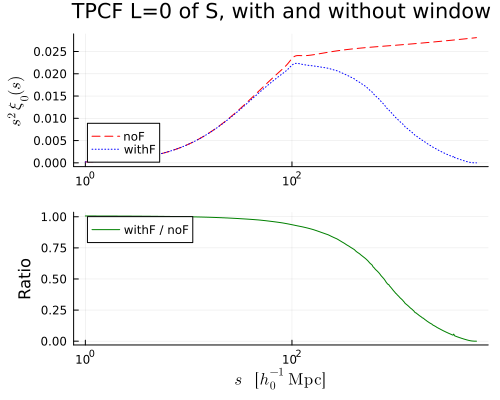

In [29]:
xs_1 = ss_S_L0_noF
ys_1 = xis_S_L0_noF .* xs_1 .^ 2

xs_2 = ss_S_L0_withF 
ys_2 = xis_S_L0_withF .* xs_2 .^ 2
spline = Spline1D(xs_2, ys_2)

p1 = plot([xs_1, xs_2], [ys_1, ys_2],
    xaxis=:log, #yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = "TPCF L=0 of S, with and without window",
    label=["noF" "withF"], ls=[:dash :dot], 
    ylabel = L"s^2 \, \xi_0(s)",
    legend=:bottomleft)

p2 = plot(xs_1, spline.(xs_1) ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    label = "withF / noF",
    #ylim=(0,2), 
    legend=:topleft, 
    xlabel=L"$s \quad [h_0^{-1} \,\mathrm{Mpc}]$",
    )
    
P = plot(p1, p2, size=(500, 400), layout= @layout [ x ; y  ] )

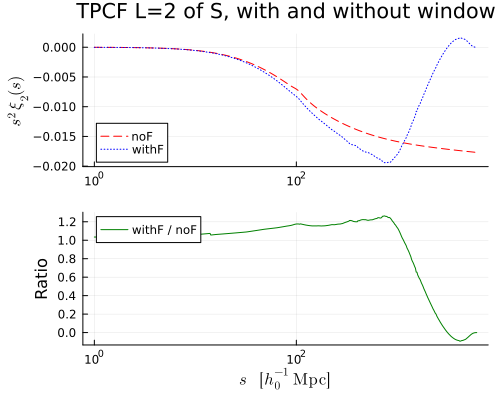

In [30]:
xs_1 = ss_S_L2_noF
ys_1 = xis_S_L2_noF .* xs_1 .^ 2

xs_2 = ss_S_L2_withF 
ys_2 = xis_S_L2_withF .* xs_2 .^ 2
spline = Spline1D(xs_2, ys_2)

p1 = plot([xs_1, xs_2], [ys_1, ys_2],
    xaxis=:log, #yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = "TPCF L=2 of S, with and without window",
    label=["noF" "withF"], ls=[:dash :dot], 
    ylabel = L"s^2 \, \xi_2(s)",
    legend=:bottomleft)

p2 = plot(xs_1, spline.(xs_1) ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    label = "withF / noF",
    #ylim=(0,2), 
    legend=:topleft, 
    xlabel=L"$s \quad [h_0^{-1} \,\mathrm{Mpc}]$",
    )
    
P = plot(p1, p2, size=(500, 400), layout= @layout [ x ; y  ] )

## LIST OF GNC EFFECTS THAT CANNOT BE CONFUSED WITH THE PNG SIGNAL

The following list contains all the GNC effects that cannot be confused with the PNG signal al large scales due to the fact that they have a different asymptotic behaviour at large scales.

In [23]:
LIST_GNC_SECURE = [
    "auto_newton", "auto_lensing", 
    
    "lensing_newton", "newton_lensing", 
    "doppler_newton", "newton_doppler", 
    "doppler_lensing", "lensing_doppler",
];

LIST_GNC_NON_SECURE = [
    "auto_doppler", "auto_localgp", "auto_integratedgp",

    "newton_localgp", "localgp_newton",
    "newton_integratedgp", "integratedgp_newton",
    
    "doppler_localgp", "localgp_doppler",
    "doppler_integratedgp", "integratedgp_doppler",
    
    "lensing_localgp", "localgp_lensing",
    "lensing_integratedgp", "integratedgp_lensing",

    "localgp_integratedgp", "integratedgp_localgp",
];


for effect in LIST_GNC_SECURE
    @assert effect in GaPSE.GR_EFFECTS_GNC "1: $effect"
end

for effect in LIST_GNC_NON_SECURE
    @assert effect in GaPSE.GR_EFFECTS_GNC "2: $effect"
end

for effect in LIST_GNC_SECURE
    @assert !(effect in LIST_GNC_NON_SECURE) "3: $effect"
end

for effect in GaPSE.GR_EFFECTS_GNC
    if effect in LIST_GNC_SECURE || effect in LIST_GNC_NON_SECURE
        nothing
    else
        throw(AssertionError("$effect is not included!"))
    end
end

## Computation of the GNC TPCFs and Newtonian TPCF (and their PS)

### Computation of the TPCFs and PS

In [24]:
name_xis_GNC_L0_noF_noobsvel_file = "xis_GNC_L0_noF_noobsvel"*filenames_appendix*".txt";
name_ps_GNC_L0_noF_noobsvel_file ="ps_GNC_L0_noF_noobsvel"*filenames_appendix*".txt";
name_xis_GNC_L0_noF_noobs_file = "xis_GNC_L0_noF_noobs"*filenames_appendix*".txt";
name_ps_GNC_L0_noF_noobs_file ="ps_GNC_L0_noF_noobs"*filenames_appendix*".txt";

name_xis_GNC_L0_withF_noobsvel_file = "xis_GNC_L0_withF_noobsvel"*filenames_appendix*".txt";
name_ps_GNC_L0_withF_noobsvel_file ="ps_GNC_L0_withF_noobsvel"*filenames_appendix*".txt";
name_xis_GNC_L0_withF_noobs_file = "xis_GNC_L0_withF_noobs"*filenames_appendix*".txt";
name_ps_GNC_L0_withF_noobs_file ="ps_GNC_L0_withF_noobs"*filenames_appendix*".txt";

In [25]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, DIR*name_xis_GNC_L0_noF_noobsvel_file, 
        10 .^ range(0, log10(2*cosmo.s_max), length = 500);
        use_windows = false, L = 0, alg = :quad, obs = :noobsvel,
        single = true, enhancer = 1e8,
        N_trap = 200, N_lob = 200, atol_quad = 0.0, rtol_quad = 1e-2, 
        N_χs = 100, N_χs_2 = 60);
end

In [26]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, DIR*name_xis_GNC_L0_withF_noobsvel_file, 
        10 .^ range(0, log10(2*cosmo.s_max), length = 500);
        use_windows = true, L = 0, alg = :quad, obs = :noobsvel,
        single = true, enhancer = 1e8,
        N_trap = 200, N_lob = 200, atol_quad = 0.0, rtol_quad = 1e-2, 
        N_χs = 100, N_χs_2 = 60);
end

In [27]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, DIR*name_xis_GNC_L0_noF_noobs_file,
        10 .^ range(0, log10(2*cosmo.s_max), length = 500);
        use_windows = false, L = 0, alg = :quad, obs = :no,
        single = true, enhancer = 1e8,
        N_trap = 200, N_lob = 200, atol_quad = 0.0, rtol_quad = 1e-2, 
        N_χs = 100, N_χs_2 = 60);
end

In [28]:
if COMPUTE_XIS_GNC == true
    GaPSE.print_map_sum_ξ_GNC_multipole(
        cosmo, DIR*name_xis_GNC_L0_withF_noobs_file, 
        10 .^ range(0, log10(2*cosmo.s_max), length = 500);
        use_windows = true, L = 0, alg = :quad, obs = :no,
        single = true, enhancer = 1e8,
        N_trap = 200, N_lob = 200, atol_quad = 0.0, rtol_quad = 1e-2, 
        N_χs = 100, N_χs_2 = 60);
end

In [29]:
ss_GNC_L0_noF_noobsvel, xis_sum_GNC_L0_noF_noobsvel, xis_all_GNC_L0_noF_noobsvel = 
    GaPSE.readxyall(DIR*name_xis_GNC_L0_noF_noobsvel_file);
spline_GNCsum_xis_L0_noF_noobsvel = Spline1D(ss_GNC_L0_noF_noobsvel, xis_sum_GNC_L0_noF_noobsvel; bc = "error");
ss_GNC_L0_noF_noobs, xis_sum_GNC_L0_noF_noobs, xis_all_GNC_L0_noF_noobs = 
    GaPSE.readxyall(DIR*name_xis_GNC_L0_noF_noobs_file);
spline_GNCsum_xis_L0_noF_noobs = Spline1D(ss_GNC_L0_noF_noobs, xis_sum_GNC_L0_noF_noobs; bc = "error");


ss_GNC_L0_withF_noobsvel, xis_sum_GNC_L0_withF_noobsvel, xis_all_GNC_L0_withF_noobsvel = 
    GaPSE.readxyall(DIR*name_xis_GNC_L0_withF_noobsvel_file);
spline_GNCsum_xis_L0_withF_noobsvel = Spline1D(ss_GNC_L0_withF_noobsvel, xis_sum_GNC_L0_withF_noobsvel; bc = "error");
ss_GNC_L0_withF_noobs, xis_sum_GNC_L0_withF_noobs, xis_all_GNC_L0_withF_noobs = 
    GaPSE.readxyall(DIR*name_xis_GNC_L0_withF_noobs_file);
spline_GNCsum_xis_L0_withF_noobs = Spline1D(ss_GNC_L0_withF_noobs, xis_sum_GNC_L0_withF_noobs; bc = "error");

In [30]:
GaPSE.print_all_PS_multipole(DIR*name_xis_GNC_L0_noF_noobsvel_file, 
    DIR*name_ps_GNC_L0_noF_noobsvel_file, "GNC"; L=0, ps_kwargs(tf)...)
ks_GNC_L0_noF_noobsvel, pks_sum_GNC_L0_noF_noobsvel, pks_all_GNC_L0_noF_noobsvel = 
    GaPSE.readxyall(DIR*name_ps_GNC_L0_noF_noobsvel_file);
spline_GNCsum_pks_L0_noF_noobsvel = Spline1D(ks_GNC_L0_noF_noobsvel, pks_sum_GNC_L0_noF_noobsvel; bc = "error");

GaPSE.print_all_PS_multipole(DIR*name_xis_GNC_L0_noF_noobs_file, 
    DIR*name_ps_GNC_L0_noF_noobs_file, "GNC"; L=0, ps_kwargs(tf)...)
ks_GNC_L0_noF_noobs, pks_sum_GNC_L0_noF_noobs, pks_all_GNC_L0_noF_noobs = 
    GaPSE.readxyall(DIR*name_ps_GNC_L0_noF_noobs_file);
spline_GNCsum_pks_L0_noF_noobs = Spline1D(ks_GNC_L0_noF_noobs, pks_sum_GNC_L0_noF_noobs; bc = "error");

GaPSE.print_all_PS_multipole(DIR*name_xis_GNC_L0_withF_noobsvel_file, 
    DIR*name_ps_GNC_L0_withF_noobsvel_file, "GNC"; L=0, ps_kwargs(tf)...)
ks_GNC_L0_withF_noobsvel, pks_sum_GNC_L0_withF_noobsvel, pks_all_GNC_L0_withF_noobsvel = 
    GaPSE.readxyall(DIR*name_ps_GNC_L0_withF_noobsvel_file);
spline_GNCsum_pks_L0_withF_noobsvel = Spline1D(ks_GNC_L0_withF_noobsvel, pks_sum_GNC_L0_withF_noobsvel; bc = "error");

GaPSE.print_all_PS_multipole(DIR*name_xis_GNC_L0_withF_noobs_file, 
    DIR*name_ps_GNC_L0_withF_noobs_file, "GNC"; L=0, ps_kwargs(tf)...)
ks_GNC_L0_withF_noobs, pks_sum_GNC_L0_withF_noobs, pks_all_GNC_L0_withF_noobs = 
    GaPSE.readxyall(DIR*name_ps_GNC_L0_withF_noobs_file);
spline_GNCsum_pks_L0_withF_noobs = Spline1D(ks_GNC_L0_withF_noobs, pks_sum_GNC_L0_withF_noobs; bc = "error");


I'm computing the PS_multipole from the file "Computations_b1p5-sb0-fevo0/xis_GNC_L0_noF_noobsvel_b1p5-sb0-fevo0.txt"for the Galaxy Number Counts.

time needed for all the Power Spectra computation [in s] = 0.17685699462890625


I'm computing the PS_multipole from the file "Computations_b1p5-sb0-fevo0/xis_GNC_L0_noF_noobs_b1p5-sb0-fevo0.txt"for the Galaxy Number Counts.

time needed for all the Power Spectra computation [in s] = 0.028225183486938477


I'm computing the PS_multipole from the file "Computations_b1p5-sb0-fevo0/xis_GNC_L0_withF_noobsvel_b1p5-sb0-fevo0.txt"for the Galaxy Number Counts.

time needed for all the Power Spectra computation [in s] = 0.025343894958496094


I'm computing the PS_multipole from the file "Computations_b1p5-sb0-fevo0/xis_GNC_L0_withF_noobs_b1p5-sb0-fevo0.txt"for the Galaxy Number Counts.

time needed for all the Power Spectra computation [in s] = 0.02677297592163086



In [31]:
ks_Newtonian_L0_noF_noobsvel, pks_Newtonian_L0_noF_noobsvel = 
    ks_GNC_L0_noF_noobsvel, pks_all_GNC_L0_noF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["auto_newton"]];
spline_Newt_pks_L0_noF_noobsvel = Spline1D(ks_Newtonian_L0_noF_noobsvel, pks_Newtonian_L0_noF_noobsvel; bc = "error");
ks_Newtonian_L0_noF_noobs, pks_Newtonian_L0_noF_noobs = 
    ks_GNC_L0_noF_noobs, pks_all_GNC_L0_noF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["auto_newton"]];
spline_Newt_pks_L0_noF_noobs = Spline1D(ks_Newtonian_L0_noF_noobs, pks_Newtonian_L0_noF_noobs; bc = "error");

ks_Newtonian_L0_withF_noobsvel, pks_Newtonian_L0_withF_noobsvel = 
    ks_GNC_L0_withF_noobsvel, pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["auto_newton"]];
spline_Newt_pks_L0_withF_noobsvel = Spline1D(ks_Newtonian_L0_withF_noobsvel, pks_Newtonian_L0_withF_noobsvel; bc = "error");
ks_Newtonian_L0_withF_noobs, pks_Newtonian_L0_withF_noobs = 
    ks_GNC_L0_withF_noobs, pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["auto_newton"]];
spline_Newt_pks_L0_withF_noobs = Spline1D(ks_Newtonian_L0_withF_noobs, pks_Newtonian_L0_withF_noobs; bc = "error");

In [32]:
pks_PARTIAL_GNC_L0_withF_noobsvel = zeros(length(pks_sum_GNC_L0_withF_noobsvel))
pks_PARTIAL_GNC_L0_withF_noobsvel += pks_sum_GNC_L0_withF_noobsvel
for effect in GaPSE.GR_EFFECTS_GNC
    if effect in LIST_GNC_SECURE
        pks_PARTIAL_GNC_L0_withF_noobsvel .-= pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[effect]]
    end
end
spline_GNCsumPARTIAL_pks_L0_withF_noobsvel = Spline1D(ks_GNC_L0_withF_noobsvel, pks_PARTIAL_GNC_L0_withF_noobsvel; bc = "error");

pks_PARTIAL_GNC_L0_withF_noobs = zeros(length(pks_sum_GNC_L0_withF_noobs))
pks_PARTIAL_GNC_L0_withF_noobs += pks_sum_GNC_L0_withF_noobs
for effect in GaPSE.GR_EFFECTS_GNC
    if effect in LIST_GNC_SECURE
        pks_PARTIAL_GNC_L0_withF_noobs .-= pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC[effect]]
    end
end
spline_GNCsumPARTIAL_pks_L0_withF_noobs = Spline1D(ks_GNC_L0_withF_noobs, pks_PARTIAL_GNC_L0_withF_noobs; bc = "error");

### Check Plots of the GNC and Newtonian TPCFs and PS

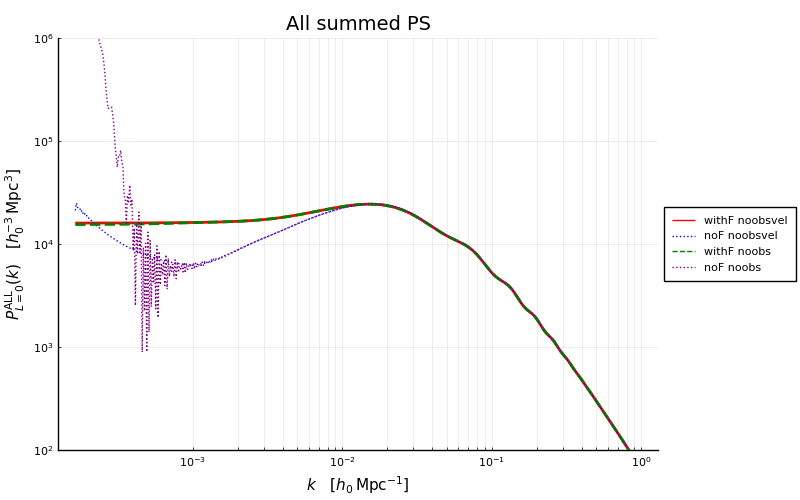

In [40]:
xs_1 = ks_GNC_L0_withF_noobsvel
ys_1 = pks_sum_GNC_L0_withF_noobsvel
xs_2 = ks_GNC_L0_noF_noobsvel
ys_2 = pks_sum_GNC_L0_noF_noobsvel
xs_3 = ks_GNC_L0_withF_noobs
ys_3 = pks_sum_GNC_L0_withF_noobs
xs_4 = ks_GNC_L0_noF_noobs
ys_4 = pks_sum_GNC_L0_noF_noobs

pyplot()
p = plot(
        xs_1[ys_1.≠0], abs.(ys_1)[ys_1.≠0], 
        size=(800, 500), axis = :log, label="withF noobsvel",
        lw=2, lc="red", ls=:solid,
        yticks = 10.0 .^ [i for i in -6:1:6], ylims = (1e2, 1e6),
        xticks = (
            vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
            vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
        ),
        title="All summed PS", 
        xlabel=L"k \quad [h_0 \,\mathrm{Mpc}^{-1}]",
        ylabel=L"P^{\mathrm{ALL}}_{L=0}(k)  \quad [h_0^{-3} \,\mathrm{Mpc}^3] ",
        #xaxis=:log, #yaxis=:log,
        top_margins=15Plots.px, legend=:outerright)
plot!(p, xs_2[ys_2.≠0], 
    abs.(ys_2)[ys_2.≠0], 
    lw=1, lc="blue", ls=:dot, label="noF noobsvel")
plot!(p, xs_3[ys_3.≠0], 
    abs.(ys_3)[ys_3.≠0], 
    lw=2, lc="green", ls=:dash, label="withF noobs")
plot!(p, xs_4[ys_4.≠0], 
    abs.(ys_4)[ys_4.≠0], 
    lw=1, lc="purple", ls=:dot, label="noF noobs")

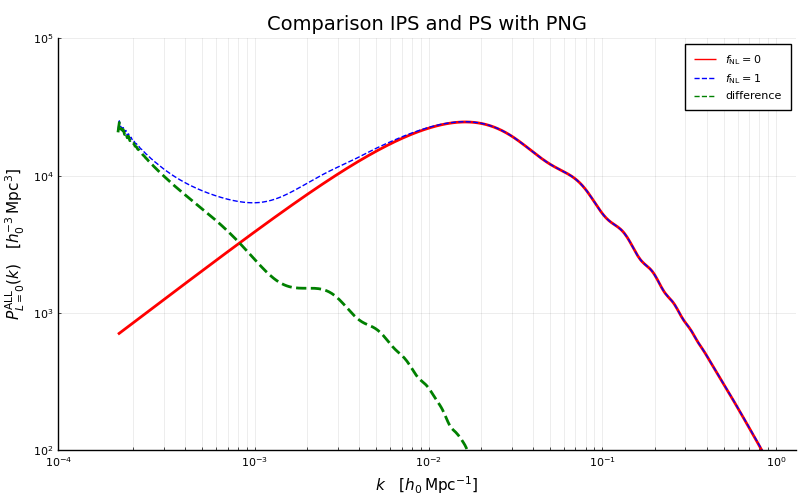

In [47]:
xs_1 = ks_GNC_L0_noF_noobsvel
ys_1 = cosmo.IPS.(ks_GNC_L0_noF_noobsvel)
xs_2 = ks_GNC_L0_noF_noobsvel
ys_2 = pks_sum_GNC_L0_noF_noobsvel
xs_3 = ks_GNC_L0_withF_noobs
ys_3 = abs.(ys_2 .- ys_1)

pyplot()
p = plot(
        xs_1[ys_1.≠0], abs.(ys_1)[ys_1.≠0], 
        size=(800, 500), axis = :log, label=L"\mathit{f}_{\rm NL} = 0",
        lw=2, lc="red", ls=:solid,
        yticks = 10.0 .^ [i for i in -6:1:6], ylims = (1e2, 1e5),
        xticks = (
            vcat([a*10.0^b for b in -4:(-1) for a in 1:9], 10.0^0), 
            vcat([a==1 ? L"10^{%$b}" : nothing for b in -4:(-1) for a in 1:9], L"10^{0}")
        ),
        title="Comparison IPS and PS with PNG", 
        xlabel=L"k \quad [h_0 \,\mathrm{Mpc}^{-1}]",
        ylabel=L"P^{\mathrm{ALL}}_{L=0}(k)  \quad [h_0^{-3} \,\mathrm{Mpc}^3] ",
        #xaxis=:log, #yaxis=:log,
        top_margins=15Plots.px, legend=:topright)
plot!(p, xs_2[ys_2.≠0], 
    abs.(ys_2)[ys_2.≠0], 
    lw=1, lc="blue", ls=:dash, label=L"\mathit{f}_{\rm NL} = 1")
plot!(p, xs_3[ys_3.≠0], 
    abs.(ys_3)[ys_3.≠0], 
    lw=2, lc="green", ls=:dash, label="difference")

┌ Warning: backend `PyPlot` is not installed.
└ @ Plots ~/.julia/packages/Plots/Hxe7H/src/backends.jl:37


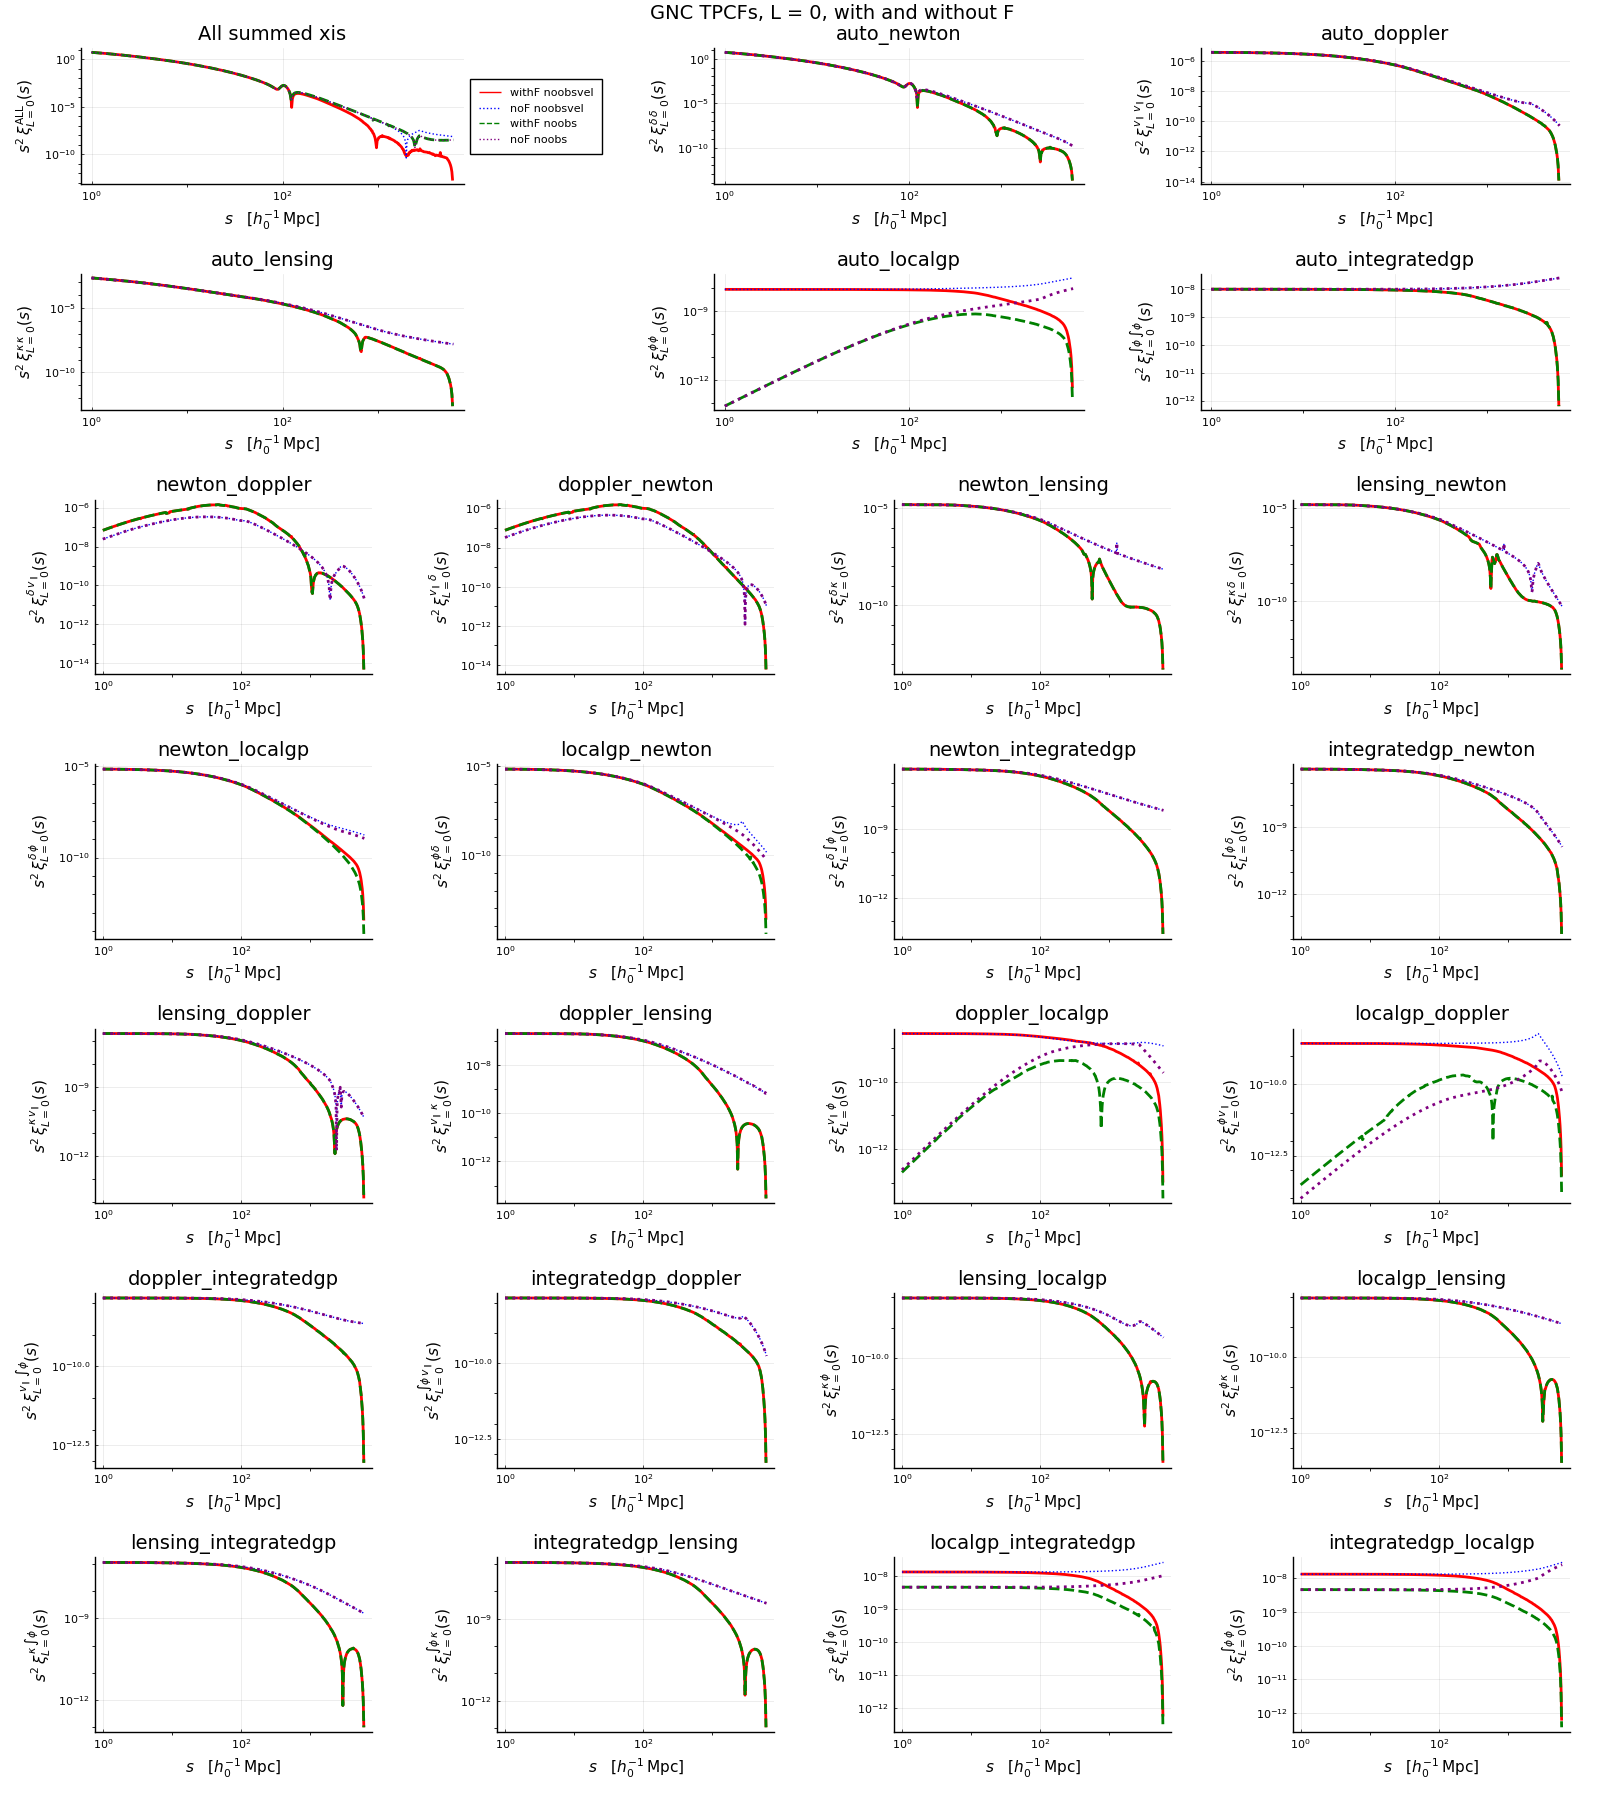

In [42]:
pyplot()
ps = [plot() for i in 1:length(GaPSE.GR_EFFECTS_GNC) + 1]

title = plot(title = "GNC TPCFs, L = 0, with and without F", grid=false, 
    showaxis = false, bottom_margin = -50Plots.px, ticks=false)

legend_pos=[
    :bottomleft,
    :bottomleft, :topright, :bottomleft, :bottomleft,
    :topleft, :topleft, :topleft, :topleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
]

xs_1 = ss_GNC_L0_withF_noobsvel
xs_2 = ss_GNC_L0_noF_noobsvel
xs_3 = ss_GNC_L0_withF_noobs
xs_4 = ss_GNC_L0_noF_noobs

ps[1] = plot(xs_1[xis_sum_GNC_L0_withF_noobsvel.≠0], 
        abs.(xis_sum_GNC_L0_withF_noobsvel)[xis_sum_GNC_L0_withF_noobsvel.≠0], size=(300, 100),
        lw=2, lc="red", ls=:solid, label="withF noobsvel",
        title="All summed xis", 
        xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
        ylabel=L"s^2 \, \xi^{\mathrm{ALL}}_{L=0}(s)",
        xaxis=:log, yaxis=:log,
        top_margins=15Plots.px, legend=:outerright)
plot!(ps[1], xs_2, abs.(xis_sum_GNC_L0_noF_noobsvel), 
    lw=1, lc="blue", ls=:dot, label="noF noobsvel")
plot!(ps[1], xs_3, abs.(xis_sum_GNC_L0_noF_noobs), 
    lw=2, lc="green", ls=:dash, label="withF noobs")
plot!(ps[1], xs_4, abs.(xis_sum_GNC_L0_noF_noobs), 
    lw=1, lc="purple", ls=:dot, label="noF noobs")

for (i, name) in enumerate(GaPSE.GR_EFFECTS_GNC)
    ys_1 = xis_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[name]]
    ys_2 = xis_all_GNC_L0_noF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[name]]
    ys_3 = xis_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC[name]]
    ys_4 = xis_all_GNC_L0_noF_noobs[GaPSE.INDEX_GR_EFFECT_GNC[name]]

    ps[i+1] = plot(
        xs_1[ys_1.≠0], abs.(ys_1)[ys_1.≠0], 
        size=(300, 100),
        lw=2, lc="red", ls=:solid, label="withF",
        title=name, 
        xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
        ylabel=L"s^2 \, " * func_ξs_names[GaPSE.INDEX_GR_EFFECT_GNC[name]](0),
        xaxis=:log, yaxis=:log,
        top_margins=15Plots.px,
        legend = false,
    )
    plot!(ps[i+1], xs_2[ys_2.≠0], abs.(ys_2)[ys_2.≠0], 
        lw=1, lc="blue", ls=:dot, label="noF noobsvel")
    plot!(ps[i+1], xs_3[ys_3.≠0], abs.(ys_3)[ys_3.≠0], 
        lw=2, lc="green", ls=:dash, label="withF noobs")
    plot!(ps[i+1], xs_4[ys_4.≠0], abs.(ys_4)[ys_4.≠0], 
        lw=2, lc="purple", ls=:dot, label="noF noobsvel")
end

l = @layout [A{0.02h}; grid(2,3){0.22h} ; grid(5,4){0.75h} ]
P = plot(title, ps..., layout=l, 
    left_margins = 15Plots.px, right_margins = 30Plots.px,
    size=(1600,1800));
P

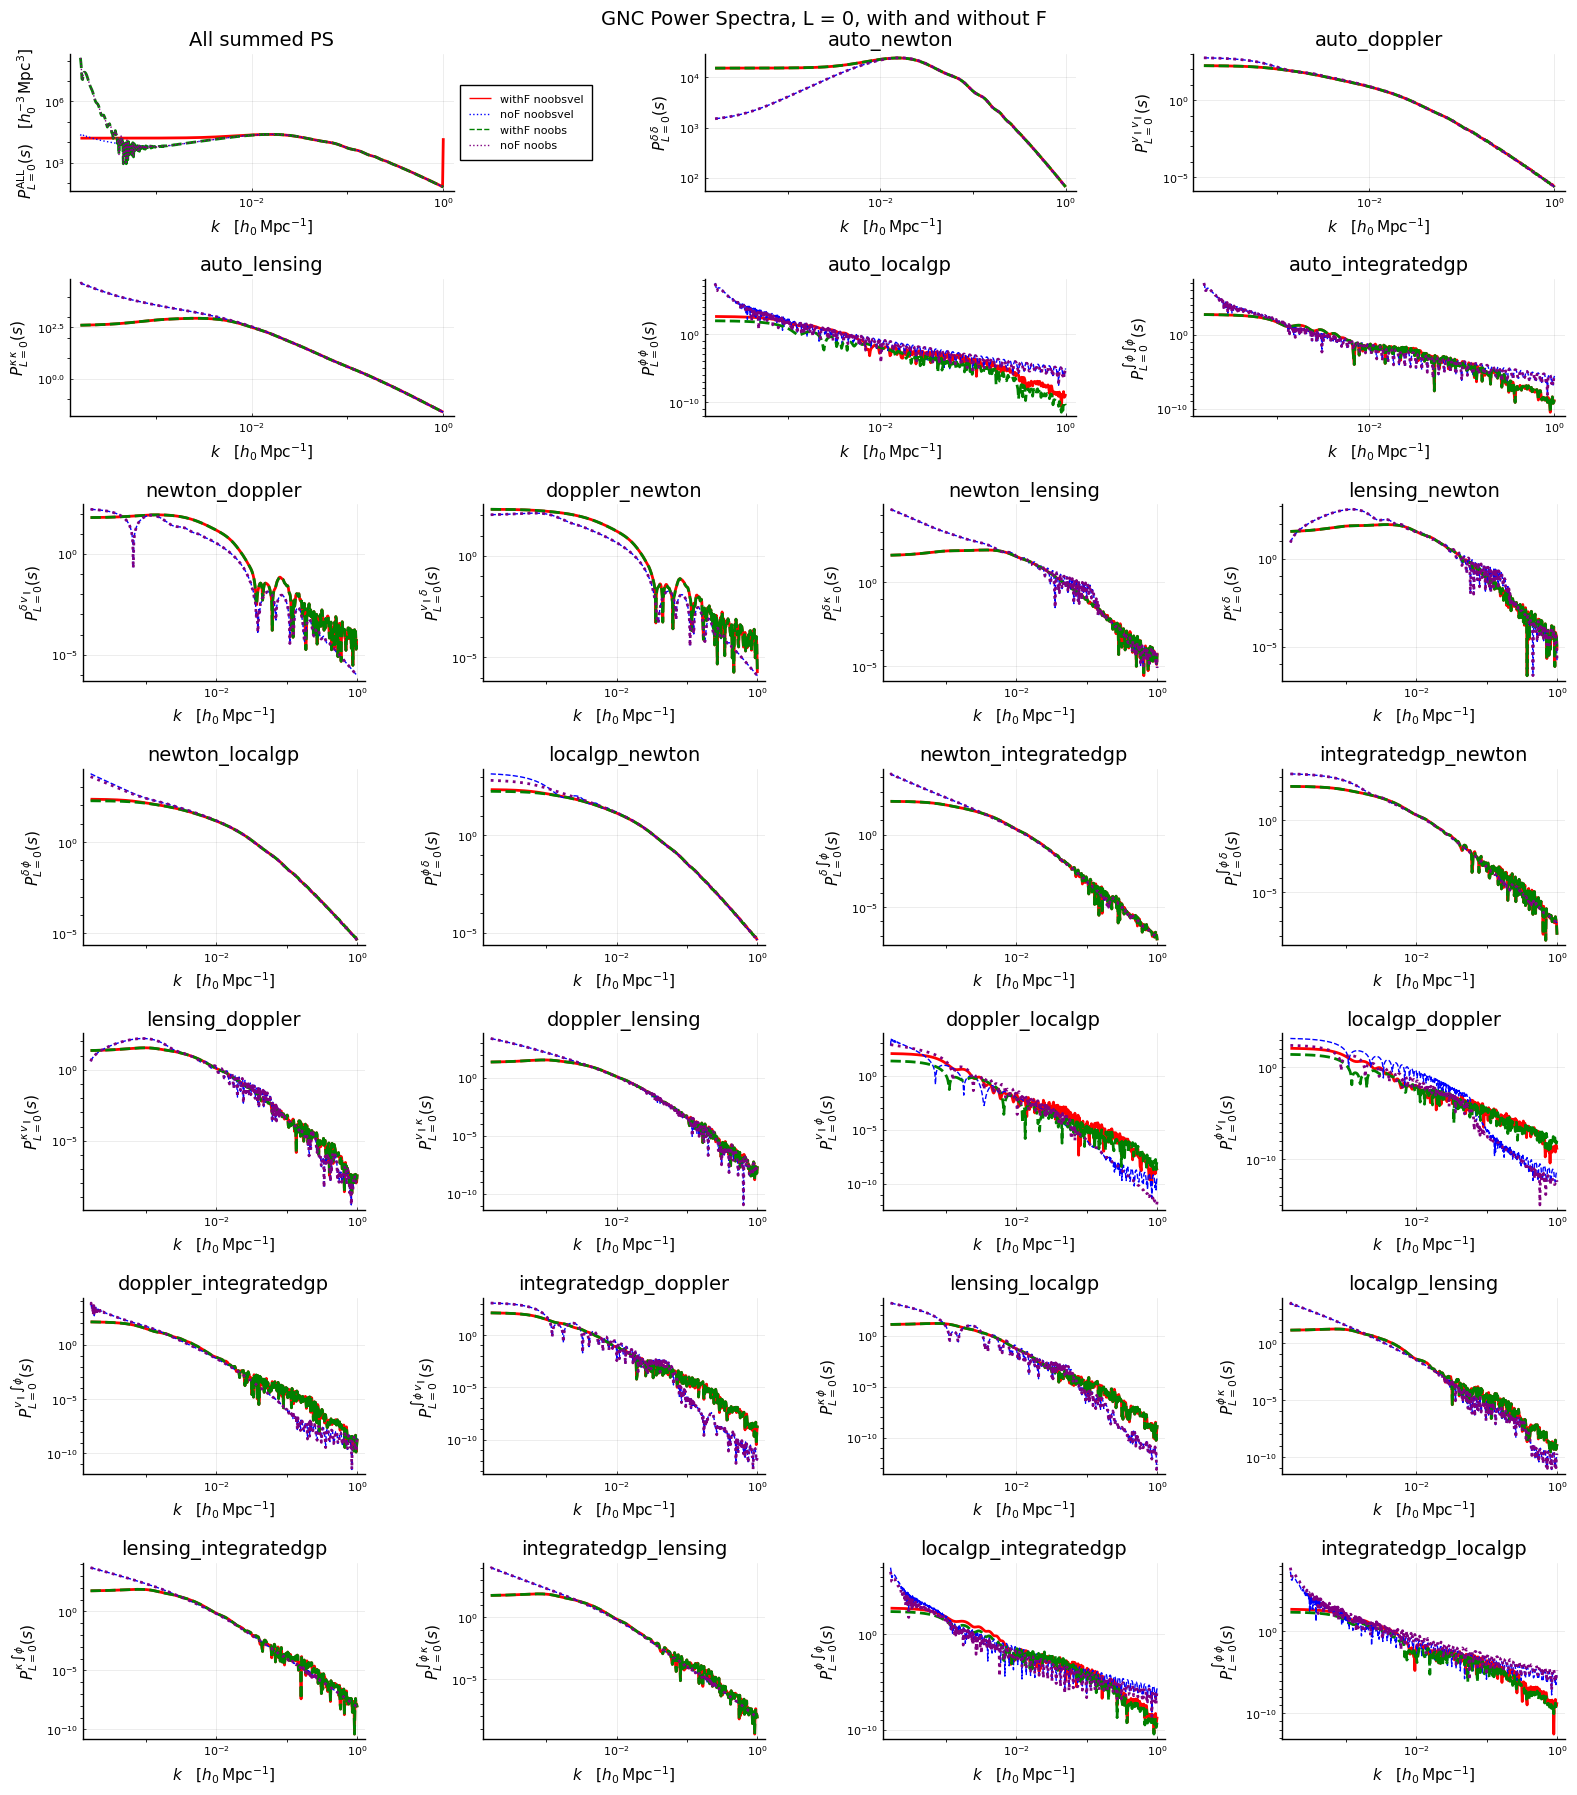

In [43]:
pyplot()
ps = [plot() for i in 1:length(GaPSE.GR_EFFECTS_GNC) + 1]

title = plot(title = "GNC Power Spectra, L = 0, with and without F", grid=false, 
    showaxis = false, bottom_margin = -50Plots.px, ticks=false)

legend_pos=[
    :bottomleft,
    :bottomleft, :topright, :bottomleft, :bottomleft,
    :topleft, :topleft, :topleft, :topleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
]

xs_1 = ks_GNC_L0_withF_noobsvel
xs_2 = ks_GNC_L0_noF_noobsvel
xs_3 = ks_GNC_L0_withF_noobs
xs_4 = ks_GNC_L0_noF_noobs

ps[1] = plot(
        xs_1[pks_sum_GNC_L0_withF_noobsvel.≠0], 
        abs.(pks_sum_GNC_L0_withF_noobsvel)[xis_sum_GNC_L0_withF_noobsvel.≠0], 
        size=(300, 100), axis = :log, label="withF noobsvel",
        lw=2, lc="red", ls=:solid,
        title="All summed PS", 
        xlabel=L"k \quad [h_0 \,\mathrm{Mpc}^{-1}]",
        ylabel=L"P^{\mathrm{ALL}}_{L=0}(s)  \quad [h_0^{-3} \,\mathrm{Mpc}^3] ",
        #xaxis=:log, #yaxis=:log,
        top_margins=15Plots.px, legend=:outerright)
plot!(ps[1], xs_2[pks_sum_GNC_L0_noF_noobsvel.≠0], 
    abs.(pks_sum_GNC_L0_noF_noobsvel)[pks_sum_GNC_L0_noF_noobsvel.≠0], 
    lw=1, lc="blue", ls=:dot, label="noF noobsvel")
plot!(ps[1], xs_3[pks_sum_GNC_L0_noF_noobs.≠0], 
    abs.(pks_sum_GNC_L0_noF_noobs)[pks_sum_GNC_L0_noF_noobs.≠0], 
    lw=2, lc="green", ls=:dash, label="withF noobs")
plot!(ps[1], xs_4[pks_sum_GNC_L0_noF_noobs.≠0], 
    abs.(pks_sum_GNC_L0_noF_noobs)[pks_sum_GNC_L0_noF_noobs.≠0], 
    lw=1, lc="purple", ls=:dot, label="noF noobs")

for (i, name) in enumerate(GaPSE.GR_EFFECTS_GNC)
    ys_1 = pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[name]]
    ys_2 = pks_all_GNC_L0_noF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[name]]
    ys_3 = pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC[name]]
    ys_4 = pks_all_GNC_L0_noF_noobs[GaPSE.INDEX_GR_EFFECT_GNC[name]]

    ps[i+1] = plot(
        xs_1[ys_1.≠0], abs.(ys_1)[ys_1.≠0], 
        size=(300, 100), axis = :log, label="withF noobsvel",
        lw=2, lc="red", ls=:solid,
        title=name, 
        xlabel=L"k \quad [h_0 \,\mathrm{Mpc}^{-1}]",
        ylabel=func_ps_names[GaPSE.INDEX_GR_EFFECT_GNC[name]](0),
        #xaxis=:log, #yaxis=:log,
        top_margins=15Plots.px,
        legend = false,
    )
    plot!(ps[i+1], xs_2[ys_2.≠0], abs.(ys_2)[ys_2.≠0], 
        lw=1, lc="blue", ls=:dash, label="noF noobsvel")
    plot!(ps[i+1], xs_3[ys_3.≠0], abs.(ys_3)[ys_3.≠0], 
        lw=2, lc="green", ls=:dash, label="withF noobs")
    plot!(ps[i+1], xs_4[ys_4.≠0], abs.(ys_4)[ys_4.≠0], 
        lw=2, lc="purple", ls=:dot, label="noF noobs")
end

l = @layout [A{0.02h}; grid(2,3){0.22h} ; grid(5,4){0.75h} ]
P = plot(title, ps..., layout=l, 
    left_margins = 15Plots.px, right_margins = 30Plots.px,
    size=(1600,1800));
savefig(P, DIR*"ps_GNC_L0_with-withoutF_noobsvel"*filenames_appendix*".pdf");

### Check major Contributors to GNC

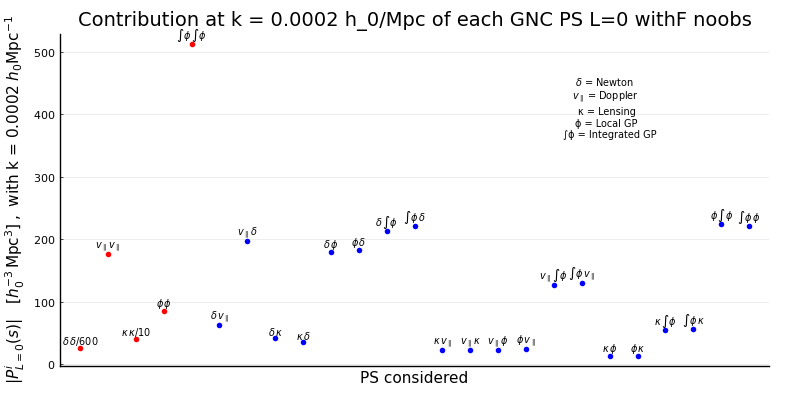

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [44]:
names = [
    L"\delta \, \delta / 600", 
    L"v_{\parallel} \, v_{\parallel}", 
    L"\kappa \, \kappa / 10", 
    L"\phi \, \phi", 
    L"\int\phi \, \int\phi", 
    
    L"\delta \, v_{\parallel}", L"v_{\parallel} \, \delta",
    L"\delta \, \kappa", L"\kappa \, \delta",
    L"\delta \, \phi", L"\phi \, \delta",
    L"\delta \, \int\phi", L"\int\phi \, \delta",
    
    L"\kappa \, v_{\parallel}", L"v_{\parallel} \, \kappa",
    L"v_{\parallel} \, \phi", L"\phi \, v_{\parallel}",
    L"v_{\parallel} \, \int\phi", L"\int\phi \, v_{\parallel}",
    
    L"\kappa \, \phi", L"\phi \, \kappa",
    L"\kappa \, \int\phi", L"\int\phi \, \kappa",
    
    L"\phi \, \int\phi", L"\int\phi \, \phi"
];
leg = L"\delta"*" = Newton    \n"*L"v_{\parallel}"*" = Doppler    \n" *
        "κ = Lensing  \n"*"ϕ = Local GP  \n"*"∫ϕ = Integrated GP"

pyplot()

k = 1e-4
index_real_k = findfirst(x -> x>k, ks_GNC_L0_withF_noobs)
real_k = ks_GNC_L0_withF_noobs[index_real_k]
ys = [begin
    num = pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC[effect]][index_real_k]
    i==1 ? num/600.0 : i==3 ? num/10 : num
    end    for (i,effect) in enumerate(GaPSE.GR_EFFECTS_GNC)];

plot(1:25, abs.(ys), seriestype=:scatter, 
    series_annotations = [text(name; pointsize=7, valign=:bottom) 
        for name in names], 
    mc=vcat([:red for i in 1:5], [:blue for i in 6:25]), 
    markerstrokewidth = 0, legend=false,
    xlabel = "PS considered",  xticks=false, size = (800, 400),
    ylabel = L"|P^{i}_{L=0}(s)| \quad [h_0^{-3}\,\mathrm{Mpc}^{3}]\; ," * 
    " with k = "* @sprintf("%.4f", real_k) * L"\; h_0\mathrm{Mpc}^{-1}",
    #ylims = (-1.10, 0.61), yticks = -1.0:0.25:0.5,
    title = "Contribution at k = " * @sprintf("%.4f", real_k) * " h_0/Mpc of each GNC PS L=0 withF noobs"
    
)

#annotate!([(12, 250, text(leg; pointsize=7))])
annotate!([(20, 0.8*max(abs.(ys)...), text(leg; pointsize=7))])

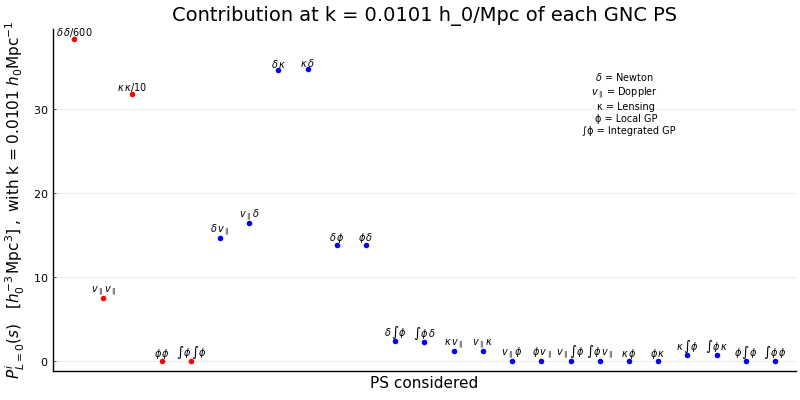

In [45]:
names = [
    L"\delta \, \delta / 600", 
    L"v_{\parallel} \, v_{\parallel}", 
    L"\kappa \, \kappa / 10", 
    L"\phi \, \phi", 
    L"\int\phi \, \int\phi", 
    
    L"\delta \, v_{\parallel}", L"v_{\parallel} \, \delta",
    L"\delta \, \kappa", L"\kappa \, \delta",
    L"\delta \, \phi", L"\phi \, \delta",
    L"\delta \, \int\phi", L"\int\phi \, \delta",
    
    L"\kappa \, v_{\parallel}", L"v_{\parallel} \, \kappa",
    L"v_{\parallel} \, \phi", L"\phi \, v_{\parallel}",
    L"v_{\parallel} \, \int\phi", L"\int\phi \, v_{\parallel}",
    
    L"\kappa \, \phi", L"\phi \, \kappa",
    L"\kappa \, \int\phi", L"\int\phi \, \kappa",
    
    L"\phi \, \int\phi", L"\int\phi \, \phi"
];
leg = L"\delta"*" = Newton    \n"*L"v_{\parallel}"*" = Doppler    \n" *
        "κ = Lensing  \n"*"ϕ = Local GP  \n"*"∫ϕ = Integrated GP"

pyplot()

k = 1e-2
index_real_k = findfirst(x -> x>k, ks_GNC_L0_withF_noobsvel)
real_k = ks_GNC_L0_withF_noobsvel[index_real_k]
ys = [begin
    num = pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[effect]][index_real_k]
    i==1 ? num/600.0 : i==3 ? num/10 : num
    end    for (i,effect) in enumerate(GaPSE.GR_EFFECTS_GNC)];

plot(1:25, abs.(ys), seriestype=:scatter, 
    series_annotations = [text(name; pointsize=7, valign=:bottom) 
        for name in names], 
    mc=vcat([:red for i in 1:5], [:blue for i in 6:25]), 
    markerstrokewidth = 0, legend=false,
    xlabel = "PS considered",  xticks=false, size = (800, 400),
    ylabel = L"P^{i}_{L=0}(s) \quad [h_0^{-3}\,\mathrm{Mpc}^{3}]\; ," * 
    " with k = "* @sprintf("%.4f", real_k) * L"\; h_0\mathrm{Mpc}^{-1}",
    #ylims = (-1.10, 0.61), yticks = -1.0:0.25:0.5,
    title = "Contribution at k = " * @sprintf("%.4f", real_k) * " h_0/Mpc of each GNC PS"
    
)

#annotate!([(12, 250, text(leg; pointsize=7))])
annotate!([(20, 0.8*max(abs.(ys)...), text(leg; pointsize=7))])

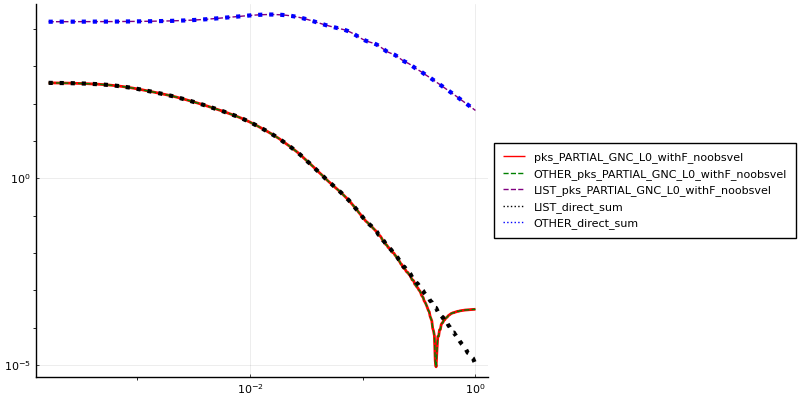

In [46]:
LIST_direct_sum = zeros(length(ks_GNC_L0_withF_noobsvel))
for effect in GaPSE.GR_EFFECTS_GNC
    if effect in LIST_GNC_SECURE
        nothing
    else
        LIST_direct_sum .+= pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[effect]]
    end
end

OTHER_direct_sum = zeros(length(ks_GNC_L0_withF_noobsvel))
for effect in GaPSE.GR_EFFECTS_GNC
    if effect in LIST_GNC_SECURE
        OTHER_direct_sum .+= pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC[effect]]
    end
end


LIST_pks_PARTIAL_GNC_L0_withF_noobsvel = pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["auto_newton"]] .+
    pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["auto_lensing"]] .+
    pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["lensing_newton"]] .+
    pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["newton_lensing"]] .+
    pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["doppler_newton"]] .+
    pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["newton_doppler"]] .+
    pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["doppler_lensing"]] .+
    pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["lensing_doppler"]]
OTHER_pks_PARTIAL_GNC_L0_withF_noobsvel = pks_sum_GNC_L0_withF_noobsvel .-  LIST_pks_PARTIAL_GNC_L0_withF_noobsvel

plot(ks_GNC_L0_withF_noobsvel, abs.(pks_PARTIAL_GNC_L0_withF_noobsvel), label="pks_PARTIAL_GNC_L0_withF_noobsvel", 
    legend = :outerright, lw=2, lc=:red, axis=:log, size=(800, 400))
plot!(ks_GNC_L0_withF_noobsvel, abs.(OTHER_pks_PARTIAL_GNC_L0_withF_noobsvel), label="OTHER_pks_PARTIAL_GNC_L0_withF_noobsvel", 
    lw=1, lc=:green, ls=:dash)
plot!(ks_GNC_L0_withF_noobsvel, abs.(LIST_pks_PARTIAL_GNC_L0_withF_noobsvel), label="LIST_pks_PARTIAL_GNC_L0_withF_noobsvel", 
    lw=1, lc=:purple, ls=:dash)
plot!(ks_GNC_L0_withF_noobsvel, abs.(LIST_direct_sum), label="LIST_direct_sum", lw=3, lc=:black, ls=:dot)
plot!(ks_GNC_L0_withF_noobsvel, abs.(OTHER_direct_sum), label="OTHER_direct_sum", lw=3, lc=:blue, ls=:dot)

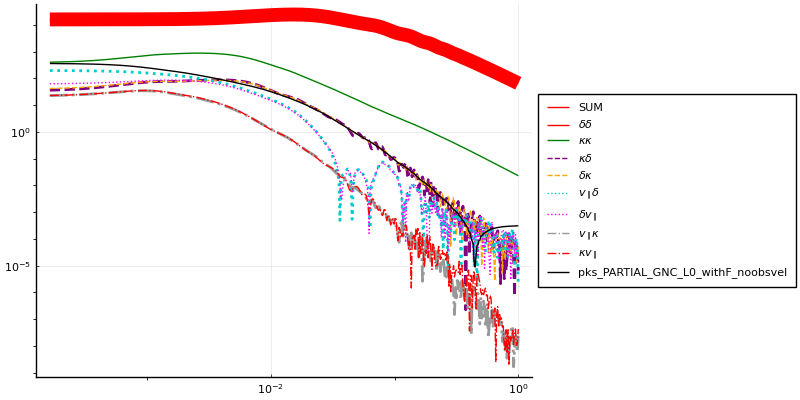

In [47]:
p = plot(
    ks_GNC_L0_withF_noobsvel, abs.(pks_sum_GNC_L0_withF_noobsvel), 
    axis=:log, label="SUM", lw=10, legend=:outerright, size=(800, 400))

plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["auto_newton"]]),
    label=L"\delta\delta", lw = 3, lc = :red)
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["auto_lensing"]]), 
    label=L"\kappa\kappa")
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["lensing_newton"]]), 
    label=L"\kappa\delta", ls=:dash, lw=2)
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["newton_lensing"]]), 
    label=L"\delta\kappa", ls=:dash)
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["doppler_newton"]]), 
    label=L"v_{\parallel} \delta", ls=:dot, lw=2)
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["newton_doppler"]]), 
    label=L"\delta v_{\parallel}", ls=:dot)
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["doppler_lensing"]]), 
    label=L"v_{\parallel} \kappa", ls=:dashdot, lw=2)
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_all_GNC_L0_withF_noobsvel[GaPSE.INDEX_GR_EFFECT_GNC["lensing_doppler"]]), 
    label=L"\kappa v_{\parallel}", ls=:dashdot)
plot!(p, ks_GNC_L0_withF_noobsvel, 
    abs.(pks_PARTIAL_GNC_L0_withF_noobsvel), label="pks_PARTIAL_GNC_L0_withF_noobsvel", ls=:solid, lc = :black)

## TPCFs and PS of the Galaxies in the Plain-Parallel Approximation

### Code for TPCFs and PS of PP

In [48]:
GaPSE.print_map_ξ_PPGalaxies_multipole(cosmo, DIR*"xi_ppg_L0_noF"*filenames_appendix*".txt",
    10 .^ range(0,log10(2*cosmo.s_max),length=500);
    L = 0, use_windows = false, pr = true, enhancer = 1e6,
    atol_quad = 0.0, rtol_quad = 1e-2);
GaPSE.print_map_ξ_PPGalaxies_multipole(cosmo, DIR*"xi_ppg_L2_noF"*filenames_appendix*".txt",
    10 .^ range(0,log10(2*cosmo.s_max),length=500);
    L = 2, use_windows = false, pr = true, enhancer = 1e6,
    atol_quad = 0.0, rtol_quad = 1e-2);
GaPSE.print_PS_multipole(DIR*"xi_ppg_L0_noF"*filenames_appendix*".txt", 
    DIR*"ps_ppg_L0_noF"*filenames_appendix*".txt"; L = 0, ps_kwargs(tf)...);
GaPSE.print_PS_multipole(DIR*"xi_ppg_L2_noF"*filenames_appendix*".txt", 
    DIR*"ps_ppg_L2_noF"*filenames_appendix*".txt"; L = 2, ps_kwargs(tf)...);


time needed for map_ξ_PPGalaxies_multipole [in s] = 0.05255 

time needed for map_ξ_PPGalaxies_multipole [in s] = 0.05250 

I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.0011930465698242188


I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.0006380081176757812



In [49]:
ss_ppg_L0_noF, xis_ppg_L0_noF = GaPSE.readxy(DIR*"xi_ppg_L0_noF"*filenames_appendix*".txt");
ss_ppg_L2_noF, xis_ppg_L2_noF = GaPSE.readxy(DIR*"xi_ppg_L2_noF"*filenames_appendix*".txt");
ks_ppg_L0_noF, pks_ppg_L0_noF = GaPSE.readxy(DIR*"ps_ppg_L0_noF"*filenames_appendix*".txt");
ks_ppg_L2_noF, pks_ppg_L2_noF = GaPSE.readxy(DIR*"ps_ppg_L2_noF"*filenames_appendix*".txt");

spline_ppg_xis_L0_noF = Spline1D(ss_ppg_L0_noF, xis_ppg_L0_noF; bc = "error");
spline_ppg_xis_L2_noF = Spline1D(ss_ppg_L2_noF, xis_ppg_L2_noF; bc = "error");
spline_ppg_pks_L0_noF = Spline1D(ks_ppg_L0_noF, pks_ppg_L0_noF; bc = "error");
spline_ppg_pks_L2_noF = Spline1D(ks_ppg_L2_noF, pks_ppg_L2_noF; bc = "error");

In [50]:
GaPSE.print_map_ξ_PPGalaxies_multipole(cosmo, DIR*"xi_ppg_L0_withF"*filenames_appendix*".txt",
    10 .^ range(0,log10(2*cosmo.s_max),length=500);
    L = 0, use_windows = true, pr = true, enhancer = 1e6,
    atol_quad = 0.0, rtol_quad = 1e-2);
GaPSE.print_map_ξ_PPGalaxies_multipole(cosmo, DIR*"xi_ppg_L2_withF"*filenames_appendix*".txt",
    10 .^ range(0,log10(2*cosmo.s_max),length=500);
    L = 2, use_windows = true, pr = true, enhancer = 1e6,
    atol_quad = 0.0, rtol_quad = 1e-2);
GaPSE.print_PS_multipole(DIR*"xi_ppg_L0_withF"*filenames_appendix*".txt", 
    DIR*"ps_ppg_L0_withF"*filenames_appendix*".txt"; L = 0, ps_kwargs(tf)...);
GaPSE.print_PS_multipole(DIR*"xi_ppg_L2_withF"*filenames_appendix*".txt", 
    DIR*"ps_ppg_L2_withF"*filenames_appendix*".txt"; L = 2, ps_kwargs(tf)...);

PP Galaxies, L=0: 100%|█████████████████████████████████| Time: 0:00:13



time needed for map_ξ_PPGalaxies_multipole [in s] = 13.93012 


PP Galaxies, L=2: 100%|█████████████████████████████████| Time: 0:00:08



time needed for map_ξ_PPGalaxies_multipole [in s] = 8.93141 

I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.0013659000396728516


I'm computing the PS_multipole from the two input vectors.

time needed for this Power Spectrum computation [in s] = 0.0006849765777587891



In [51]:
ss_ppg_L0_withF, xis_ppg_L0_withF = GaPSE.readxy(DIR*"xi_ppg_L0_withF"*filenames_appendix*".txt");
ss_ppg_L2_withF, xis_ppg_L2_withF = GaPSE.readxy(DIR*"xi_ppg_L2_withF"*filenames_appendix*".txt");
ks_ppg_L0_withF, pks_ppg_L0_withF = GaPSE.readxy(DIR*"ps_ppg_L0_withF"*filenames_appendix*".txt");
ks_ppg_L2_withF, pks_ppg_L2_withF = GaPSE.readxy(DIR*"ps_ppg_L2_withF"*filenames_appendix*".txt");

spline_ppg_xis_L0_withF = Spline1D(ss_ppg_L0_withF, xis_ppg_L0_withF; bc = "error");
spline_ppg_xis_L2_withF = Spline1D(ss_ppg_L2_withF, xis_ppg_L2_withF; bc = "error");
spline_ppg_pks_L0_withF = Spline1D(ks_ppg_L0_withF, pks_ppg_L0_withF; bc = "error");
spline_ppg_pks_L2_withF = Spline1D(ks_ppg_L2_withF, pks_ppg_L2_withF; bc = "error");

### Check Plots on PP TPCFs and PS

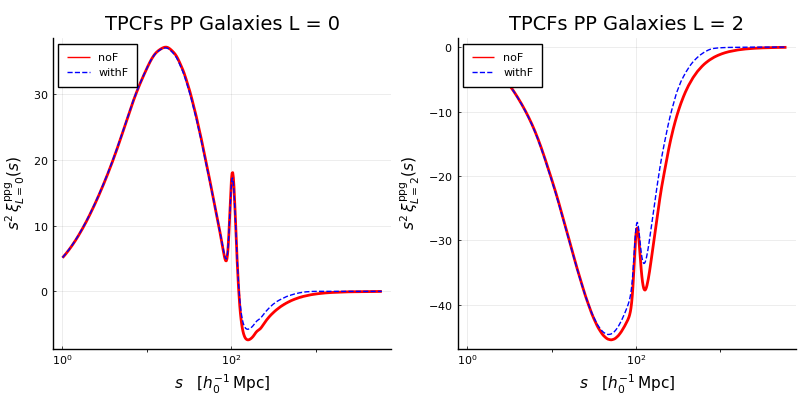

In [52]:
pyplot()
ps = [plot() for i in 1:2]

#title = plot(title = "PP TPCFs, L = 0 and 2, with and without F", grid=false, 
#    showaxis = false, bottom_margin = -50Plots.px, ticks=false)

legend_pos=[
    :bottomleft,
    :bottomleft, :topright, :bottomleft, :bottomleft,
    :topleft, :topleft, :topleft, :topleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
]

ps[1] = plot(
    ss_ppg_L0_noF, xis_ppg_L0_noF .* ss_ppg_L0_noF .^2, 
    lw=2, lc="red", ls=:solid, label = "noF",
    title="TPCFs PP Galaxies L = 0", size=(300, 100), 
    xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
    ylabel=L"s^2 \, \xi^{\mathrm{ppg}}_{L=0}(s)",
    xaxis=:log, #yaxis=:log,
    top_margins=15Plots.px, legend=:topleft)
plot!(ps[1],
    ss_ppg_L0_withF, xis_ppg_L0_withF .* ss_ppg_L0_withF .^2, 
    lw=1, lc="blue", ls=:dash, label = "withF",)

ps[2] = plot(
    ss_ppg_L2_noF, xis_ppg_L2_noF .* ss_ppg_L2_noF .^2, 
    lw=2, lc="red", ls=:solid, label = "noF",
    title="TPCFs PP Galaxies L = 2", size=(300, 100), 
    xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
    ylabel=L"s^2 \, \xi^{\mathrm{ppg}}_{L=2}(s)",
    xaxis=:log, #yaxis=:log,
    top_margins=15Plots.px, legend=:topleft)
plot!(ps[2],
    ss_ppg_L2_withF, xis_ppg_L2_withF .* ss_ppg_L2_withF .^2, 
    lw=1, lc="blue", ls=:dash, label = "withF",)

P = plot(ps..., layout=grid(1,2), 
    #left_margins = 15Plots.px, right_margins = 30Plots.px,
    size=(800, 400));
P

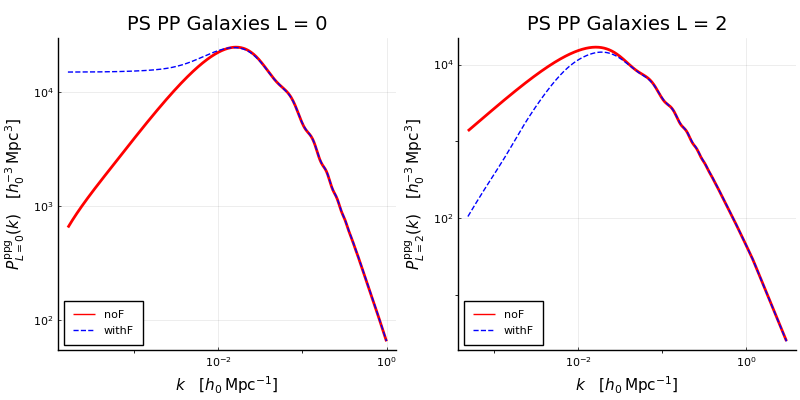

In [53]:
pyplot()
ps = [plot() for i in 1:2]

#title = plot(title = "PP TPCFs, L = 0 and 2, with and without F", grid=false, 
#    showaxis = false, bottom_margin = -50Plots.px, ticks=false)

legend_pos=[
    :bottomleft,
    :bottomleft, :topright, :bottomleft, :bottomleft,
    :topleft, :topleft, :topleft, :topleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
]

ps[1] = plot(
    ks_ppg_L0_noF[pks_ppg_L0_noF.≠0], abs.(pks_ppg_L0_noF)[pks_ppg_L0_noF.≠0], 
    lw=2, lc="red", ls=:solid, label = "noF",
    title="PS PP Galaxies L = 0", size=(300, 100), 
    xlabel=L"k \quad [h_0\,\mathrm{Mpc}^{-1}]",
    ylabel=L"P^{\mathrm{ppg}}_{L=0}(k) \quad [h_0^{-3}\,\mathrm{Mpc}^3]",
    xaxis=:log, yaxis=:log,
    top_margins=15Plots.px, legend=:bottomleft)
plot!(ps[1],
    ks_ppg_L0_withF[pks_ppg_L0_withF.≠0], abs.(pks_ppg_L0_withF)[pks_ppg_L0_withF.≠0], 
    lw=1, lc="blue", ls=:dash, label = "withF",)

ps[2] = plot(
    ks_ppg_L2_noF[pks_ppg_L2_noF.≠0], abs.(pks_ppg_L2_noF)[pks_ppg_L2_noF.≠0], 
    lw=2, lc="red", ls=:solid, label = "noF",
    title="PS PP Galaxies L = 2", size=(300, 100), 
    xlabel=L"k \quad [h_0\,\mathrm{Mpc}^{-1}]",
    ylabel=L"P^{\mathrm{ppg}}_{L=2}(k) \quad [h_0^{-3}\,\mathrm{Mpc}^3]",
    xaxis=:log, yaxis=:log,
    top_margins=15Plots.px, legend=:bottomleft)
plot!(ps[2],
    ks_ppg_L2_withF[pks_ppg_L2_withF.≠0], abs.(pks_ppg_L2_withF)[pks_ppg_L2_withF.≠0], 
    lw=1, lc="blue", ls=:dash, label = "withF",)

P = plot(ps..., layout=grid(1,2), 
    #left_margins = 15Plots.px, right_margins = 30Plots.px,
    size=(800, 400));
P

## Code for the differences: Newtonian - PPG , GNCsum - Newtonian , GNCsum - PPG

In [54]:
ks = ks_GNC_L0_withF_noobsvel;
diff_Newt_ppg =  [spline_Newt_pks_L0_withF_noobsvel(k) - spline_ppg_pks_L0_noF(k) for k in ks];
#diff_ALLGRsum_ppg = pks_ALLGRsum_L0_withF .- pks_ppg_L0_withF;
#diff_ALLGRsum_Newt = pks_ALLGRsum_L0_withF .- pks_Newtonian_L0_withF_noobsvel;
diff_GNCsum_ppg = [spline_GNCsum_pks_L0_withF_noobsvel(k) - spline_ppg_pks_L0_withF(k) for k in ks];
diff_GNCsum_Newt = [spline_GNCsum_pks_L0_withF_noobsvel(k) - spline_Newt_pks_L0_withF_noobsvel(k) for k in ks];

## Cross check Plots GNCsum-Newt-PPGalaxies

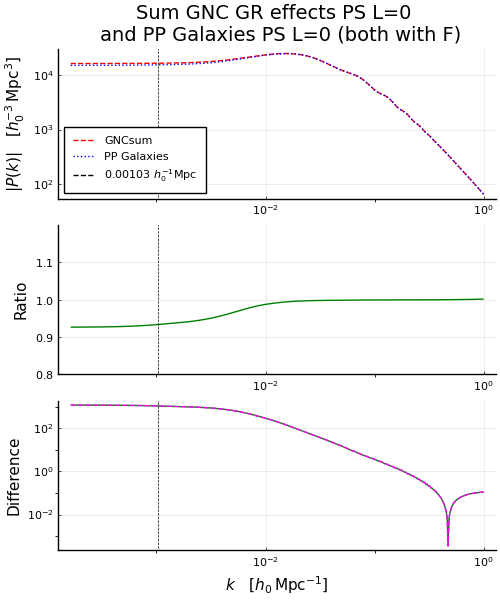

In [55]:
xs_1 = ks
ys_1 = spline_GNCsum_pks_L0_withF_noobsvel.(ks)

xs_2 = ks
ys_2 = spline_ppg_pks_L0_withF.(ks)
spline = Spline1D(xs_2, ys_2)

xs_3 = ks
ys_3 = diff_GNCsum_ppg

S_VLIM = 2*π/(2*cosmo.s_max)
S_VLIM_F = @sprintf("%.5f", S_VLIM)

p1 = plot([xs_1, xs_2], [abs.(ys_1), abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], yticks = 10.0 .^ [i for i in 2:5],
    title = "Sum GNC GR effects PS L=0 \n and PP Galaxies PS L=0 (both with F)",
    label=["GNCsum" "PP Galaxies"], ls=[:dash :dot], 
    ylabel = L"|P(k)| \quad [h_0^{-3}\,\mathrm{Mpc}^3]",
    legend=:bottomleft)
vline!(p1, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:black, lw=0.5, ls=:dash)

p2 = plot(xs_1, spline.(xs_1) ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log,
    ylim=(0.8,1.2), 
    legend=false, 
    #xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
vline!(p2, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:black, lw=0.5, ls=:dash)

p3 = plot(xs_1, abs.(spline.(xs_1) .- ys_1), 
    ylabel="Difference", lc=:green, 
    axis=:log,
    #ylim=(0.0,2), 
    legend=false, 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$")
plot!(p3, xs_3, abs.(ys_3), lc=:magenta, ls=:dash)
VAXES = 4e-3
vline!(p3, [S_VLIM], label="$VAXES Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

P = plot(p1, p2, p3, size=(500, 600), layout= @layout [ x ; y ; z ] )
#savefig(P, DIR*"PS_L0_GNCsum-PPGalaxies_withF"*filenames_appendix*".pdf")
#display(P)

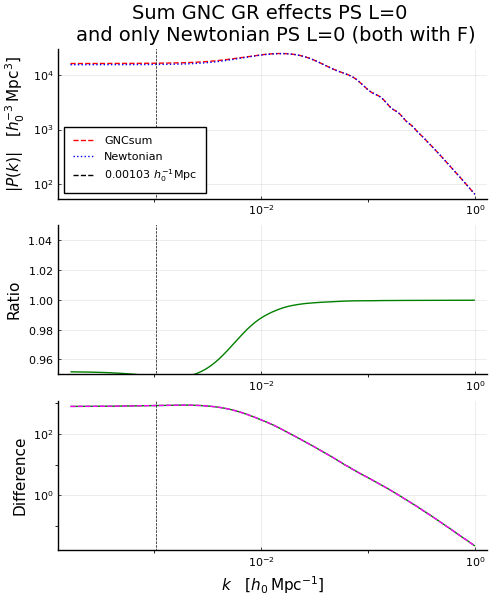

In [56]:
xs_1 = ks
ys_1 = spline_GNCsum_pks_L0_withF_noobsvel.(ks)

xs_2 = ks
ys_2 = spline_Newt_pks_L0_withF_noobsvel.(ks)
spline = Spline1D(xs_2, ys_2)

xs_3 = ks
ys_3 = diff_GNCsum_Newt

S_VLIM = 2*π/(2*cosmo.s_max)
S_VLIM_F = @sprintf("%.5f", S_VLIM)

p1 = plot([xs_1, xs_2], [abs.(ys_1), abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], yticks = 10.0 .^ [i for i in 2:5],
    title = "Sum GNC GR effects PS L=0 \n and only Newtonian PS L=0 (both with F)",
    label=["GNCsum" "Newtonian"], ls=[:dash :dot], 
    ylabel = L"|P(k)| \quad [h_0^{-3}\,\mathrm{Mpc}^3]",
    legend=:bottomleft)
vline!(p1, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:black, lw=0.5, ls=:dash)

p2 = plot(xs_1, spline.(xs_1) ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    ylim=(0.95,1.05), 
    legend=false, 
    #xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
vline!(p2, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:black, lw=0.5, ls=:dash)

p3 = plot(xs_1, abs.(spline.(xs_1) .- ys_1), 
    ylabel="Difference", lc=:green, 
    axis=:log, 
    #ylim=(0.0,2), 
    legend=false, 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$")
plot!(p3, xs_3, abs.(ys_3), lc=:magenta, ls=:dash)
VAXES = 4e-3
vline!(p3, [S_VLIM], label="$VAXES Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

P = plot(p1, p2, p3, size=(500, 600), layout= @layout [ x ; y ; z ] )
#savefig(P, DIR*"PS_L0_GNCsum-Newton_withF"*filenames_appendix*".pdf")
#display(P)

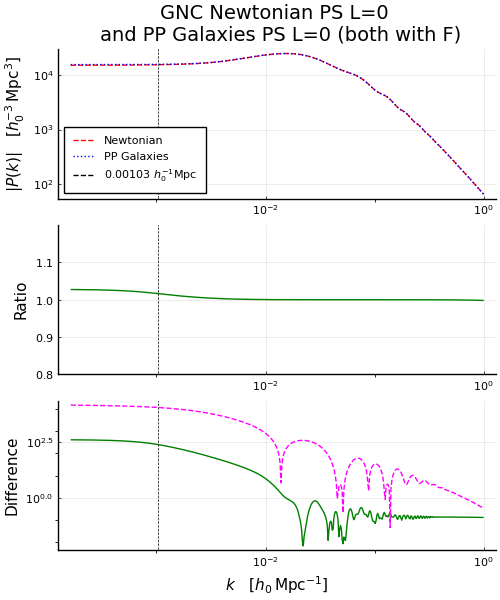

In [57]:
xs_1 = ks
ys_1 = spline_ppg_pks_L0_withF.(ks)

xs_2 = ks
ys_2 = spline_Newt_pks_L0_withF_noobsvel.(ks)
spline = Spline1D(xs_2, ys_2)


xs_3 = ks
ys_3 = diff_Newt_ppg

S_VLIM = 2*π/(2*cosmo.s_max)
S_VLIM_F = @sprintf("%.5f", S_VLIM)

p1 = plot([xs_1, xs_2], [abs.(ys_1), abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], yticks = 10.0 .^ [i for i in 2:5],
    title = "GNC Newtonian PS L=0 \n and PP Galaxies PS L=0 (both with F)",
    label=["Newtonian" "PP Galaxies"], ls=[:dash :dot], 
    ylabel = L"|P(k)| \quad [h_0^{-3}\,\mathrm{Mpc}^3]",
    legend=:bottomleft)
vline!(p1, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:black, lw=0.5, ls=:dash)

p2 = plot(xs_1, spline.(xs_1) ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    ylim=(0.8,1.2), 
    legend=false, 
    #xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
vline!(p2, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:black, lw=0.5, ls=:dash)

p3 = plot(xs_1, abs.(spline.(xs_1) .- ys_1), 
    ylabel="Difference", lc=:green, 
    axis=:log,
    #ylim=(0.0,2), 
    legend=false, 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$")
plot!(p3, xs_3, abs.(ys_3), lc=:magenta, ls=:dash)
VAXES = 4e-3
vline!(p3, [S_VLIM], label="$VAXES Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

P = plot(p1, p2, p3, size=(500, 600), layout= @layout [ x ; y ; z ] )
#savefig(P, DIR*"PS_L0_Newton-PPGalaxies_withF"*filenames_appendix*".pdf")
#display(P)

## RESULTS

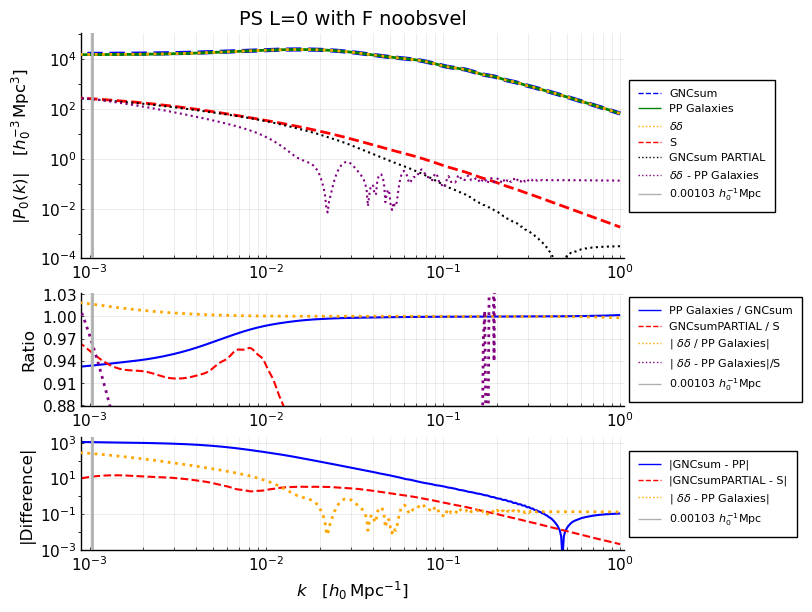

In [58]:
TICKFONTSIZE, LABELFONTSIZE = 11, 12;

KS = ks

xs_1 = KS
ys_1 = spline_ppg_pks_L0_withF.(KS)

xs_2 = KS
ys_2 = spline_GNCsum_pks_L0_withF_noobsvel.(KS)

xs_3 = KS
ys_3 = spline_S_pks_L0_withF.(KS)

xs_4 = KS
ys_4 = spline_GNCsumPARTIAL_pks_L0_withF_noobsvel.(KS)

xs_5 = KS
ys_5 = spline_Newt_pks_L0_withF_noobsvel.(KS)

S_VLIM = 2*π/(2*cosmo.s_max)
S_VLIM_F = @sprintf("%.5f", S_VLIM)

p1 = plot(
    axis=:log, 
    yticks = 10.0 .^ [i for i in -6:2:6], ylims = (1e-4, 1.1e5),
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), xlims = (0.9e-3, 1.05e0),
    title = "PS L=0 with F noobsvel",  tickfontsize=TICKFONTSIZE, labelfontsize=LABELFONTSIZE,
    ylabel = L"|P_0(k)| \quad [h_0^{-3}\,\mathrm{Mpc}^3]",
    legend=:outerright)
plot!(p1, xs_2, abs.(ys_2), label="GNCsum", lc=:blue, ls=:dash, lw=3.0)
plot!(p1, xs_1, abs.(ys_1), label="PP Galaxies", lc=:green, ls=:solid, lw=2.0)
plot!(p1, xs_5, abs.(ys_5), label=L"\delta\delta", lc=:orange, ls=:dot, lw=2.0)
plot!(p1, xs_3, abs.(ys_3), label="S", lc=:red, ls=:dash, lw=2.0)
plot!(p1, xs_4, abs.(ys_4), label="GNCsum PARTIAL", lc=:black, ls=:dot, lw=1.5)
plot!(p1, xs_1, abs.(ys_5 .- ys_1), label=L"\delta\delta" * " - PP Galaxies", lc=:purple, ls=:dot, lw=1.5)
vline!(p1, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:grey69, lw=2, ls=:solid)

p2 = plot(xs_1, ys_1 ./ ys_2, 
    ylabel="Ratio", xaxis=:log, 
    ylim=(0.879,1.031), label="PP Galaxies / GNCsum",
    yticks=[i for i in 0.88:0.03:1.03],
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), xlims = (0.9e-3, 1.05e0),
    legend=:outerright, tickfontsize=TICKFONTSIZE, labelfontsize=LABELFONTSIZE,
    lc=:blue, ls=:solid, lw=1.5
    #xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
plot!(p2, xs_1, ys_4 ./ ys_3, label="GNCsumPARTIAL / S",
    lc=:red, ls=:dash, lw=1.5)
plot!(p2, xs_1, ys_5 ./ ys_1, lc=:orange, ls = :dot, lw=2.0, label = "| "*L"\delta\delta"*" / PP Galaxies|")
plot!(p2, xs_1, abs.(ys_5 .- ys_1) ./ ys_3, lc=:purple, ls = :dot, lw=2.0, label = "| "*L"\delta\delta"*" - PP Galaxies|/S")
vline!(p2, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:grey69, lw=2, ls=:solid)

p3 = plot(xs_1, abs.(ys_1 .- ys_2), 
    ylabel="|Difference|",  lc=:blue, ls = :solid, lw=1.5,
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), xlims = (0.9e-3, 1.05e0),
    tickfontsize=TICKFONTSIZE, labelfontsize=LABELFONTSIZE,
    yticks = 10.0 .^ [i for i in -3:2:3], ylim=(1e-3, 2e3),
    axis=:log, legend=:outerright, label = "|GNCsum - PP|",
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$")
plot!(p3, xs_1, abs.(ys_4 .- ys_3), lc=:red, ls = :dash, lw=1.5, label = "|GNCsumPARTIAL - S|")
plot!(p3, xs_1, abs.(ys_5 .- ys_1), lc=:orange, ls = :dot, lw=2.0, label = "| "*L"\delta\delta"*" - PP Galaxies|")
vline!(p3, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:grey69, lw=2, ls=:solid)

P2 = plot(p1, p2, p3, size=(800, 600), layout= @layout [ x{0.5h} ; y ; z ] )
savefig(P2,  DIR*"RESULTS_PS_L0_withF_noobsvel"*filenames_appendix*".pdf");
#display(P)

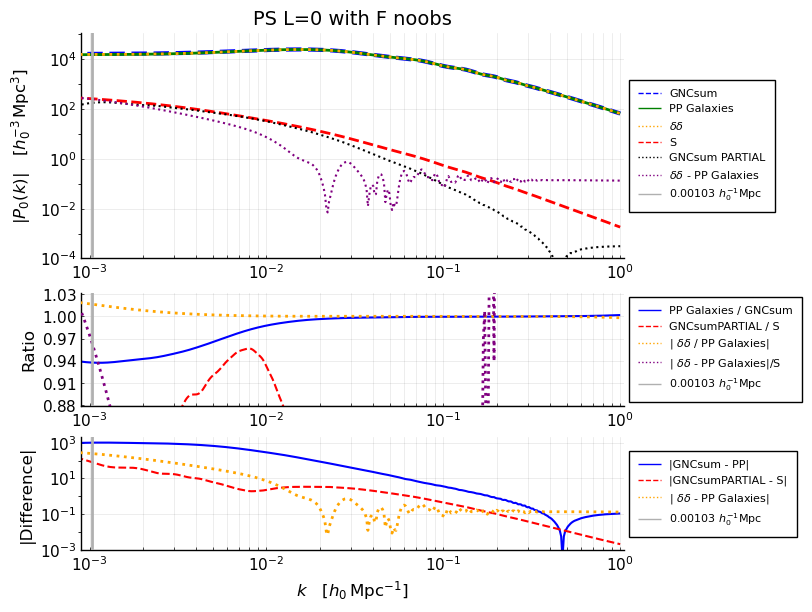

In [59]:
TICKFONTSIZE, LABELFONTSIZE = 11, 12;

KS = ks

xs_1 = KS
ys_1 = spline_ppg_pks_L0_withF.(KS)

xs_2 = KS
ys_2 = spline_GNCsum_pks_L0_withF_noobs.(KS)

xs_3 = KS
ys_3 = spline_S_pks_L0_withF.(KS)

xs_4 = KS
ys_4 = spline_GNCsumPARTIAL_pks_L0_withF_noobs.(KS)

xs_5 = KS
ys_5 = spline_Newt_pks_L0_withF_noobs.(KS)

S_VLIM = 2*π/(2*cosmo.s_max)
S_VLIM_F = @sprintf("%.5f", S_VLIM)

p1 = plot(
    axis=:log, 
    yticks = 10.0 .^ [i for i in -6:2:6], ylims = (1e-4, 1.1e5),
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), xlims = (0.9e-3, 1.05e0),
    title = "PS L=0 with F noobs",  tickfontsize=TICKFONTSIZE, labelfontsize=LABELFONTSIZE,
    ylabel = L"|P_0(k)| \quad [h_0^{-3}\,\mathrm{Mpc}^3]",
    legend=:outerright)
plot!(p1, xs_2, abs.(ys_2), label="GNCsum", lc=:blue, ls=:dash, lw=3.0)
plot!(p1, xs_1, abs.(ys_1), label="PP Galaxies", lc=:green, ls=:solid, lw=2.0)
plot!(p1, xs_5, abs.(ys_5), label=L"\delta\delta", lc=:orange, ls=:dot, lw=2.0)
plot!(p1, xs_3, abs.(ys_3), label="S", lc=:red, ls=:dash, lw=2.0)
plot!(p1, xs_4, abs.(ys_4), label="GNCsum PARTIAL", lc=:black, ls=:dot, lw=1.5)
plot!(p1, xs_1, abs.(ys_5 .- ys_1), label=L"\delta\delta" * " - PP Galaxies", lc=:purple, ls=:dot, lw=1.5)
vline!(p1, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:grey69, lw=2, ls=:solid)

p2 = plot(xs_1, ys_1 ./ ys_2, 
    ylabel="Ratio", xaxis=:log, 
    ylim=(0.879,1.031), label="PP Galaxies / GNCsum",
    yticks=[i for i in 0.88:0.03:1.03],
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), xlims = (0.9e-3, 1.05e0),
    legend=:outerright, tickfontsize=TICKFONTSIZE, labelfontsize=LABELFONTSIZE,
    lc=:blue, ls=:solid, lw=1.5
    #xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
plot!(p2, xs_1, ys_4 ./ ys_3, label="GNCsumPARTIAL / S",
    lc=:red, ls=:dash, lw=1.5)
plot!(p2, xs_1, ys_5 ./ ys_1, lc=:orange, ls = :dot, lw=2.0, label = "| "*L"\delta\delta"*" / PP Galaxies|")
plot!(p2, xs_1, abs.(ys_5 .- ys_1) ./ ys_3, lc=:purple, ls = :dot, lw=2.0, label = "| "*L"\delta\delta"*" - PP Galaxies|/S")
vline!(p2, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:grey69, lw=2, ls=:solid)

p3 = plot(xs_1, abs.(ys_1 .- ys_2), 
    ylabel="|Difference|",  lc=:blue, ls = :solid, lw=1.5,
    xticks = (
        vcat([a*10.0^b for b in -3:(-1) for a in 1:9], 10.0^0), 
        vcat([a==1 ? L"10^{%$b}" : nothing for b in -3:(-1) for a in 1:9], L"10^{0}")
    ), xlims = (0.9e-3, 1.05e0),
    tickfontsize=TICKFONTSIZE, labelfontsize=LABELFONTSIZE,
    yticks = 10.0 .^ [i for i in -3:2:3], ylim=(1e-3, 2e3),
    axis=:log, legend=:outerright, label = "|GNCsum - PP|",
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$")
plot!(p3, xs_1, abs.(ys_4 .- ys_3), lc=:red, ls = :dash, lw=1.5, label = "|GNCsumPARTIAL - S|")
plot!(p3, xs_1, abs.(ys_5 .- ys_1), lc=:orange, ls = :dot, lw=2.0, label = "| "*L"\delta\delta"*" - PP Galaxies|")
vline!(p3, [S_VLIM], label="$S_VLIM_F " * L" h_0^{-1}\mathrm{Mpc}", lc=:grey69, lw=2, ls=:solid)

P2 = plot(p1, p2, p3, size=(800, 600), layout= @layout [ x{0.5h} ; y ; z ] )
savefig(P2,  DIR*"RESULTS_PS_L0_withF_noobs"*filenames_appendix*".pdf");
#display(P)

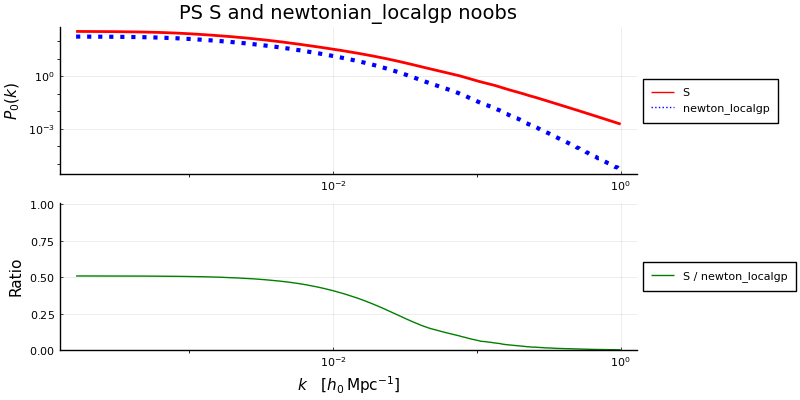

In [60]:
xs_1 = ks_GNC_L0_withF_noobs
ys_1 = spline_S_pks_L0_withF.(xs_1)

xs_2 = ks_GNC_L0_withF_noobs
ys_2 = pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["newton_localgp"]]
spline = Spline1D(xs_2, ys_2)

p1 = plot([xs_1, abs.(xs_2)], [ys_1, abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = "PS S and newtonian_localgp noobs", lw=[2 3],
    label=["S" "newton_localgp"], ls=[:solid :dot], 
    ylabel = L"P_0(k)",
    legend=:outerright)
#vline!(p1, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p1, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

p2 = plot(xs_1, ys_2 ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    label = "S / newton_localgp",
    ylim=(0.,1.01), 
    legend=:outerright, 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
#vline!(p2, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p2, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
    
P = plot(p1, p2, size=(800, 400), layout= @layout [ x ; y  ] )
#savefig(P, "xi_S_L2_noF"*filenames_appendix*".pdf");

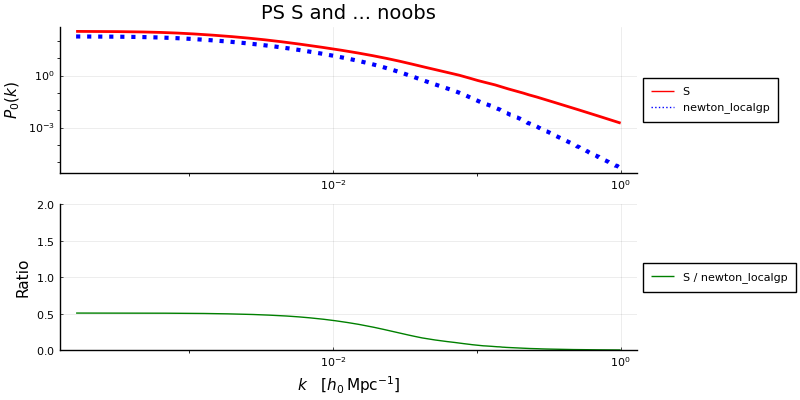

In [61]:
xs_1 = ks_GNC_L0_withF_noobs
ys_1 = spline_S_pks_L0_withF.(xs_1)

xs_2 = ks_GNC_L0_withF_noobs
#=
ys_2 = pks_sum_GNC_L0_withF_noobs .- (
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["auto_newton"]] .+
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["auto_lensing"]] .+
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["newton_lensing"]] .+
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["lensing_newton"]] .+
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["doppler_newton"]] .+
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["newton_doppler"]] .+
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["doppler_lensing"]] .+
    pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["lensing_doppler"]]
    )
=#
ys_2 = pks_all_GNC_L0_withF_noobs[GaPSE.INDEX_GR_EFFECT_GNC["newton_localgp"]]

spline = Spline1D(xs_2, ys_2)

p1 = plot([xs_1, abs.(xs_2)], [ys_1, abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = "PS S and ... noobs", lw=[2 3],
    label=["S" "newton_localgp"], ls=[:solid :dot], 
    ylabel = L"P_0(k)",
    legend=:outerright)
#vline!(p1, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p1, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

p2 = plot(xs_1, abs.(ys_2 ./ ys_1), 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    label = "S / newton_localgp",
    ylim=(0.,2), 
    legend=:outerright, 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
#vline!(p2, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p2, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
    
P = plot(p1, p2, size=(800, 400), layout= @layout [ x ; y  ] )
#savefig(P, "xi_S_L2_noF"*filenames_appendix*".pdf");

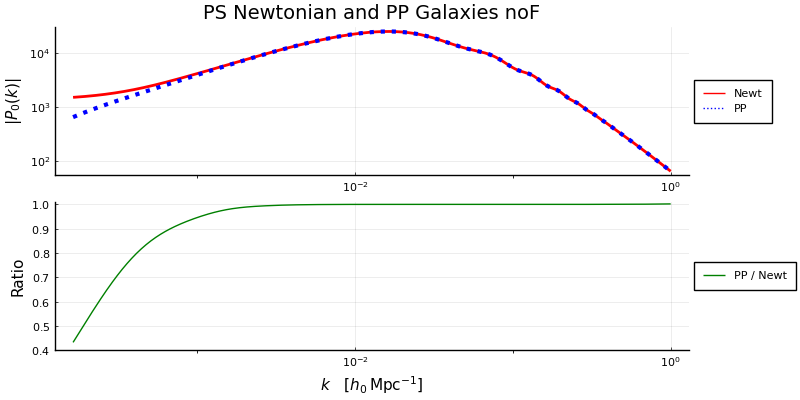

In [62]:
xs_1 = ks_GNC_L0_noF_noobs
ys_1 = spline_Newt_pks_L0_noF_noobs.(xs_1)

xs_2 = ks_GNC_L0_noF_noobs
ys_2 = spline_ppg_pks_L0_noF.(xs_2)
spline = Spline1D(xs_2, ys_2)

p1 = plot([xs_1, abs.(xs_2)], [ys_1, abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = "PS Newtonian and PP Galaxies noF", lw=[2 3],
    label=["Newt" "PP"], ls=[:solid :dot], 
    ylabel = L"|P_0(k)|",
    legend=:outerright)
#vline!(p1, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p1, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

p2 = plot(xs_1, ys_2 ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    label = "PP / Newt",
    ylim=(0.4,1.01), 
    legend=:outerright, 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
#vline!(p2, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p2, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
    
P = plot(p1, p2, size=(800, 400), layout= @layout [ x ; y  ] )
#savefig(P, "xi_S_L2_noF"*filenames_appendix*".pdf");

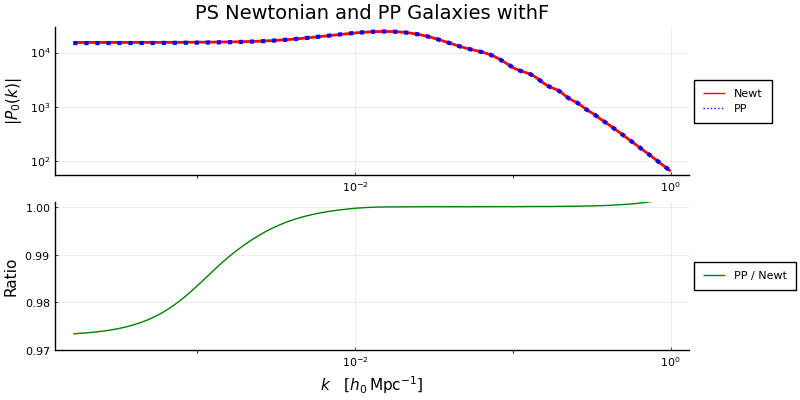

In [63]:
xs_1 = ks_GNC_L0_withF_noobs
ys_1 = spline_Newt_pks_L0_withF_noobs.(xs_1)

xs_2 = ks_GNC_L0_withF_noobs
ys_2 = spline_ppg_pks_L0_withF.(xs_2)
spline = Spline1D(xs_2, ys_2)

p1 = plot([xs_1, abs.(xs_2)], [ys_1, abs.(ys_2)],
    xaxis=:log, yaxis=:log, 
    lc=[:red :blue], #yticks = 10.0 .^ [i for i in 2:5],
    title = "PS Newtonian and PP Galaxies withF", lw=[2 3],
    label=["Newt" "PP"], ls=[:solid :dot], 
    ylabel = L"|P_0(k)|",
    legend=:outerright)
#vline!(p1, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p1, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

p2 = plot(xs_1, ys_2 ./ ys_1, 
    ylabel="Ratio", lc=:green, 
    xaxis=:log, 
    label = "PP / Newt",
    ylim=(0.97,1.001), 
    legend=:outerright, 
    xlabel=L"$k \quad [h_0 \,\mathrm{Mpc}^{-1}]$",
    )
#vline!(p2, [ss_S_L0_noF[begin]], label="$(ss_S_L0_withF[begin]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
#vline!(p2, [ss_S_L0_noF[end]], label="$(ss_S_L0_withF[end]) Mpc/h_0", lc=:black, lw=0.5, ls=:dash)
    
P = plot(p1, p2, size=(800, 400), layout= @layout [ x ; y  ] )
#savefig(P, "xi_S_L2_noF"*filenames_appendix*".pdf");

## Write in a file

In [64]:
open(DIR * "RESULTS"*filenames_appendix*".txt", "w") do io
    GaPSE.parameters_used(io, cosmo)
    println(io, "#\n#\n#")
    println(io, 
        "# Here we report the Primordial Non-Gaussianities (PNG) Signal (S) in the Power Spectrum (PS or P) monopoles\n"*
        "# and the General Relativistic (GR) effects arising in the Galaxy Number Counts (GNC). \n" *
        "# All the PS are measured in h_0^{-3} Mpc^3 and are computed from the Two-Point Correlation Functions (TPCFs) \n" *
        "# considering an azimuthally simmetric window function; check the code for more information.\n" *
        "# As a short legend: \n" *
        "# \t - ppg = plane-parallel galaxies : PS monopole of the Galaxies using the Plane-Parallel approximation \n" *
        "# \t - S = Signal : signal of the PNG, using the f_{NL} prescription \n" *
        "# \t - delta delta : autocorrelation of the Newtonian term (= sum of density and redshift perturbations) \n" *
        "# \t - GNCsum : sum of all the 25 PS arising from the 25 GNC TPCFs\n" *
        "# \t - noobs = no-observer : all the terms in the TPCFs analytical expressions related to the observer are neglected \n" *
        "# \t - noobsvel = no-observer-velocity : only the observer terms related to his velocity are neglected (i.e. the ones \n" *
        "# \t     in the Doppler term), while the others are still taken into account"
    )
    println(io, "# LIST = " * string(LIST_GNC_SECURE[begin:end-1] .* " + "...) * LIST_GNC_SECURE[end])
    println(io, "# " *
        "1: k [h_0/Mpc] \t " * 
        "2: P_0^{ppg} \t " * 
        "3: P_0^{S} \t " * 
        "4: P_0^{delta delta, noobsvel} \t " * 
        "5: P_0^{GNCsum, noobsvel} \t " * 
        "6: P_0^{GNCsum - LIST, noobsvel} \t " *
        "7: P_0^{delta delta, noobs} \t " * 
        "8: P_0^{GNCsum, noobs} \t " * 
        "9: P_0^{GNCsum - LIST, noobs}"
    ) 
    
    for k in ks_GNC_L0_withF_noobsvel
        println(io, 
            "$k \t " * 
            "$(spline_ppg_pks_L0_withF(k)) \t " *
            "$(spline_S_pks_L0_withF(k)) \t " * 
            "$(spline_Newt_pks_L0_withF_noobsvel(k)) \t " * 
            "$(spline_GNCsum_pks_L0_withF_noobsvel(k)) \t "*
            "$(spline_GNCsumPARTIAL_pks_L0_withF_noobsvel(k)) \t " *
            "$(spline_Newt_pks_L0_withF_noobs(k)) \t " * 
            "$(spline_GNCsum_pks_L0_withF_noobs(k)) \t "*
            "$(spline_GNCsumPARTIAL_pks_L0_withF_noobs(k))"
        )
    end
end

## END